In [1]:
import pandas as pd
import numpy as np
pd.options.mode.copy_on_write = True

In [2]:
np.set_printoptions(suppress=True)

In [3]:
import seaborn as sns

In [4]:
# make the plots bigger
sns.set_theme(rc={'figure.figsize':(18.7,15.27)})

# Exploratory Data Analysis [25 points]

We will be using the Motor Vehicle Collision for New York City dataset from data.gov

The Motor Vehicle Collisions crash table contains details on the crash event. Each row represents a crash event. The Motor Vehicle Collisions data tables contain information from all police reported motor vehicle collisions in NYC. The police report (MV104-AN) is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage.

In this notebook, we will take a look at the dataset, and see what exploration we can do with the data.

Several papers have been published using this data:

1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9364745/

In [5]:
# read in the dataset.This is accessible from the data.gov website
#https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes/resource/b5a431d2-4832-43a6-9334-86b62bdb033f

In [6]:
# If you want to download the file, put it in your google drive and then read
# from there, you can see options here:
# https://colab.research.google.com/notebooks/io.ipynb

In [7]:
crashes = pd.read_csv("https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv", low_memory=False)

In [8]:
crashes.head()

CRASH DATE CRASH TIME   BOROUGH ZIP CODE  LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN       NaN        NaN   
1  03/26/2022      11:45       NaN      NaN       NaN        NaN   
2  11/01/2023       1:29  BROOKLYN    11230  40.62179 -73.970024   
3  06/29/2022       6:55       NaN      NaN       NaN        NaN   
4  09/21/2022      13:21       NaN      NaN       NaN        NaN   

                 LOCATION           ON STREET NAME CROSS STREET NAME  \
0                     NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                     NaN  QUEENSBORO BRIDGE UPPER               NaN   
2  (40.62179, -73.970024)            OCEAN PARKWAY          AVENUE K   
3                     NaN       THROGS NECK BRIDGE               NaN   
4                     NaN          BROOKLYN BRIDGE               NaN   

  OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0             NaN  ...                    Unspecified   
1             NaN  ...                            NaN   
2             NaN  ...                    Unspecified   
3             NaN  ...                    Unspecified   
4             NaN  ...                    Unspecified   

   CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                    Unspecified                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
0                            NaN       4455765   
1                            NaN       4513547   
2                            NaN       4675373   
3                            NaN       4541903   
4                            NaN       4566131   

                   VEHICLE TYPE CODE 1  VEHICLE TYPE CODE 2  \
0                                Sedan                Sedan   
1                                Sedan                  NaN   
2                                Moped                Sedan   
3                                Sedan        Pick-up Truck   
4  Station Wagon/Sport Utility Vehicle                  NaN   

   VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
0                  NaN                 NaN                 NaN  
1                  NaN                 NaN                 NaN  
2                Sedan                 NaN                 NaN  
3                  NaN                 NaN                 NaN  
4                  NaN                 NaN                 NaN  

[5 rows x 29 columns]

## Question 1 [0.5 point]

Display the first 10 rows. How many observations do you have in the dataset? How many variables? Display the datatypes of the variables.

In [9]:
# fill code here to display the first 10 rows

print(crashes.head(10))

   CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  11/01/2023       1:29  BROOKLYN    11230  40.621790 -73.970024   
3  06/29/2022       6:55       NaN      NaN        NaN        NaN   
4  09/21/2022      13:21       NaN      NaN        NaN        NaN   
5  04/26/2023      13:30       NaN      NaN        NaN        NaN   
6  11/01/2023       7:12       NaN      NaN        NaN        NaN   
7  11/01/2023       8:01       NaN      NaN        NaN        NaN   
8  04/26/2023      22:20       NaN      NaN        NaN        NaN   
9  09/11/2021       9:35  BROOKLYN    11208  40.667202 -73.866500   

                 LOCATION            ON STREET NAME   CROSS STREET NAME  \
0                     NaN     WHITESTONE EXPRESSWAY           20 AVENUE   
1                     NaN   QUEENSBORO BRIDGE UPPER                 NaN   
2  (40.62179, -

In [10]:
# fill code here to count the number of rows and columns

num_rows, num_columns = crashes.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 2155718
Number of columns: 29


In [11]:
# fill code here to display the datatypes

print(crashes.dtypes)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

## Question 2a [1.5 points]

Of all the variables in the dataset, lets limit our analysis to the most relevant ones. We are going to make a simplifying assumptions that only one vehichle is involved in any crash.

Lets create some simpler outcome variables. Create two new variables, called
`injury` and `death`, that is just the total number of injuries and deathts in any given crash

Additionally, lets focus on whether anyone was injured or died, rather than the whether they were passengers, pedestrians or cyclists. So lets combine all injury/death related variables into one. Create a new variable 'outcome', that takes 3 values:


injured: if anyone was injured

death: if anyone died

safe: if there were no injuries/death

If an accident involved both injuries and death, it should take the value death.

In [12]:
# first create a new injury variable that is the sum of all injuries.
# fill code here

crashes["injury"] = (
    crashes["NUMBER OF PERSONS INJURED"].fillna(0) +
    crashes["NUMBER OF PEDESTRIANS INJURED"].fillna(0) +
    crashes["NUMBER OF CYCLIST INJURED"].fillna(0) +
    crashes["NUMBER OF MOTORIST INJURED"].fillna(0)
)


# then create a new death variable that is the sum of all killed variables.
# fill code here


crashes["death"] = (
    crashes["NUMBER OF PERSONS KILLED"].fillna(0) +
    crashes["NUMBER OF PEDESTRIANS KILLED"].fillna(0) +
    crashes["NUMBER OF CYCLIST KILLED"].fillna(0) +
    crashes["NUMBER OF MOTORIST KILLED"].fillna(0)
)


# now create a new variable outcome, that takes the values: safe, death, injured
# If accident involved both deaths and injuries, it should take the value death
# fill code here

def classify_outcome(row):
    if row["death"] > 0:
        return "death"
    elif row["injury"] > 0:
        return "injured"
    else:
        return "safe"

crashes["outcome"] = crashes.apply(classify_outcome, axis=1)





In [13]:
crashes.head()

CRASH DATE CRASH TIME   BOROUGH ZIP CODE  LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN       NaN        NaN   
1  03/26/2022      11:45       NaN      NaN       NaN        NaN   
2  11/01/2023       1:29  BROOKLYN    11230  40.62179 -73.970024   
3  06/29/2022       6:55       NaN      NaN       NaN        NaN   
4  09/21/2022      13:21       NaN      NaN       NaN        NaN   

                 LOCATION           ON STREET NAME CROSS STREET NAME  \
0                     NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                     NaN  QUEENSBORO BRIDGE UPPER               NaN   
2  (40.62179, -73.970024)            OCEAN PARKWAY          AVENUE K   
3                     NaN       THROGS NECK BRIDGE               NaN   
4                     NaN          BROOKLYN BRIDGE               NaN   

  OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
0             NaN  ...                            NaN       4455765   
1             NaN  ...                            NaN       4513547   
2             NaN  ...                            NaN       4675373   
3             NaN  ...                            NaN       4541903   
4             NaN  ...                            NaN       4566131   

                   VEHICLE TYPE CODE 1  VEHICLE TYPE CODE 2  \
0                                Sedan                Sedan   
1                                Sedan                  NaN   
2                                Moped                Sedan   
3                                Sedan        Pick-up Truck   
4  Station Wagon/Sport Utility Vehicle                  NaN   

   VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4  VEHICLE TYPE CODE 5  injury  \
0                  NaN                  NaN                  NaN     4.0   
1                  NaN                  NaN                  NaN     2.0   
2                Sedan                  NaN                  NaN     2.0   
3                  NaN                  NaN                  NaN     0.0   
4                  NaN                  NaN                  NaN     0.0   

  death  outcome  
0   0.0  injured  
1   0.0  injured  
2   0.0  injured  
3   0.0     safe  
4   0.0     safe  

[5 rows x 32 columns]


## Question 2b [1 points]
Subset your dataset to keep the following columns:


`'COLLISION_ID', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'outcome', 'injury', 'death', 'CONTRIBUTING FACTOR VEHICLE 1', 'VEHICLE TYPE CODE 1'`


The rest of the questions in this analysis should be based on the subset dataset you just created


In [14]:
# Subset your data to the above variables
# fill code here

columns_to_keep = [
    "COLLISION_ID", "CRASH DATE", "CRASH TIME", "BOROUGH", "ZIP CODE",
    "outcome", "injury", "death", "CONTRIBUTING FACTOR VEHICLE 1", "VEHICLE TYPE CODE 1"
]

crashes_subset = crashes[columns_to_keep]

In [15]:
# Lets rename these columns to snake_case make them easier to type
# fill code here

crashes_subset.columns = [
    "collision_id", "crash_date", "crash_time", "borough", "zip_code",
    "outcome", "injury", "death", "contributing_factor_vehicle_1", "vehicle_type_code_1"
]


## Question 3 [1 point]

Convert the CRASH DATE to a datetime variable type. Find the first and last day in the data

In [16]:
# Convert the datattype of crash_date to datetime.
# Hint: Take a look at the pd.to_datetime() function
# fill code here

crashes_subset["crash_date"] = pd.to_datetime(crashes_subset["crash_date"], format="%m/%d/%Y", errors="coerce")



In [17]:
# find the first and last day in the data
# fill code here

first_day = crashes_subset["crash_date"].min()
last_day = crashes_subset["crash_date"].max()

print(f"First crash date: {first_day}")
print(f"Last crash date: {last_day}")



First crash date: 2012-07-01 00:00:00
Last crash date: 2025-02-11 00:00:00


## Question 4 [4 points]

In this question, we will look at missing values. Most datasets in real life (and this is a dataset from real life) will have missing values that you would need to deal with.

1. Take a look at the total number of missing values by column.  
2. Convert this number into a percent, aka, what percent of the column is missing?


In [18]:
# find total number of missing values by columns
# fill code here

missing_values = crashes_subset.isna().sum()
print(missing_values)


collision_id                          0
crash_date                            0
crash_time                            0
borough                          667415
zip_code                         667683
outcome                               0
injury                                0
death                                 0
contributing_factor_vehicle_1      7382
vehicle_type_code_1               15087
dtype: int64


In [19]:
# convert the numbers into a percent
# fill code here

missing_percentage = (missing_values / len(crashes_subset)) * 100
print(missing_percentage)


collision_id                      0.000000
crash_date                        0.000000
crash_time                        0.000000
borough                          30.960218
zip_code                         30.972650
outcome                           0.000000
injury                            0.000000
death                             0.000000
contributing_factor_vehicle_1     0.342438
vehicle_type_code_1               0.699860
dtype: float64


## Question 5  [3 points]

We identified 6 variables with varying levels of missing values. Lets see how we can deal with it.

1. For `borough` and `zipcode`, the missing values can be filled in with either the mode or a new value "Unknown". Which do you think is the best?



2. For `contributing_factor`, and `vehicle_code` list out all values of the variable, and their count. Fill the missing values with the mode of the variable

3. For `injury` and `death` variables, drop the rows that have missing values of these variables


In [20]:
# fill the missing values for borough and zipcode with "Unknown"
# fill code here

crashes_subset.loc[:, "borough"] = crashes_subset["borough"].fillna("Unknown")
crashes_subset.loc[:, "zip_code"] = crashes_subset["zip_code"].fillna("Unknown")


In [21]:
# fill missing values of contributing_factor and vehicle_code with the mode of
# the respective column
# fill code here

mode_contributing_factor = crashes_subset["contributing_factor_vehicle_1"].mode()[0]
mode_vehicle_type = crashes_subset["vehicle_type_code_1"].mode()[0]

crashes_subset.loc[:, "contributing_factor_vehicle_1"] = crashes_subset["contributing_factor_vehicle_1"].fillna(mode_contributing_factor)
crashes_subset.loc[:, "vehicle_type_code_1"] = crashes_subset["vehicle_type_code_1"].fillna(mode_vehicle_type)



In [22]:
# drop any rows in the dataset that have missing values for either death or
# injury
# fill code here

crashes_subset.dropna(subset=["injury", "death"], inplace=True)



In [23]:
# check to see if the missing values have all been handled
# fill code here

missing_values_after = crashes_subset.isna().sum()
print(missing_values_after)


collision_id                     0
crash_date                       0
crash_time                       0
borough                          0
zip_code                         0
outcome                          0
injury                           0
death                            0
contributing_factor_vehicle_1    0
vehicle_type_code_1              0
dtype: int64


## Question 6a [2 points]

If you take a closer look at the `VEHICLE TYPE CODE 1`, you will find that the data is not clean. For example, E-Bike, E-BIKE, ebike, all appear as distinct categories.

This is usually common with data that is manually entered (and requires a lot of manual work to clean up).

A simple start would be to convert everything to lowercase, remove all special characters and spaces, and see what we get!


In [24]:
crashes_subset['vehicle_type_code_1'].value_counts(dropna=False)

vehicle_type_code_1
Sedan                                  627754
Station Wagon/Sport Utility Vehicle    480995
PASSENGER VEHICLE                      416206
SPORT UTILITY / STATION WAGON          180291
Taxi                                    53880
                                        ...  
BULLDOZER                                   1
HD                                          1
MARKED VAN                                  1
SKID LOADE                                  1
Surburban                                   1
Name: count, Length: 1755, dtype: int64

In [25]:
# fill code to convert 'vehicle_code' to lowercase

crashes_subset["vehicle_type_code_1"] = crashes_subset["vehicle_type_code_1"].str.lower()

In [26]:
# feel free to add any other special characters you want
special_characters = [",", "/", "\\", ":", "-", " "]
# fill code to remove all special characters from vehicle_Code

for char in special_characters:
    crashes_subset["vehicle_type_code_1"] = crashes_subset["vehicle_type_code_1"].str.replace(char, "", regex=False)

crashes_subset["vehicle_type_code_1"] = crashes_subset["vehicle_type_code_1"].str.strip()

In [27]:
crashes_subset['vehicle_type_code_1'].value_counts(dropna=False)

vehicle_type_code_1
sedan                              627765
stationwagonsportutilityvehicle    480995
passengervehicle                   416206
sportutilitystationwagon           180291
taxi                                85794
                                    ...  
niu                                     1
uspstruc                                1
na                                      1
firettruc                               1
surburban                               1
Name: count, Length: 1158, dtype: int64

We were able to reduce the categories by around 600! There is still too many, but  it is still a start!

## Question 6b [2 points]


Another change we can make is club everything with less than 1000 count into an 'other' category. These cases are pretty rare, so it does not make sense to keep them. That will further reduce the complexity of this variable

In [28]:
# First find all categories that are less than 1000
# Hint: save the result of value_counts() as a dataframe, and then subset it
# fill code here

vehicle_counts = crashes_subset["vehicle_type_code_1"].value_counts()
rare_vehicles = vehicle_counts[vehicle_counts < 1000].index

In [29]:
# replace the vehicle_code that appears less than 1000 times with 'other'
# fill code here

crashes_subset.loc[crashes_subset["vehicle_type_code_1"].isin(rare_vehicles), "vehicle_type_code_1"] = "other"

In [30]:
len(crashes_subset['vehicle_type_code_1'].unique())

32

Woah! We got it down significantly, that is pretty great!!

Now that we have cleaned the dataset reasonably well, lets see if we can extract some insights from the data. We will do that using some basic visualizations.


## Question 7a [2 points]

Plot a bar plot of the total number of deaths, injuries, and safe accidents that happened int the entire dataset.

Hint: use countplot()

<ipython-input-31-f34caf467a5e>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(formatted_labels)


outcome
safe       1643609
injured     508895
death         3214
Name: count, dtype: int64


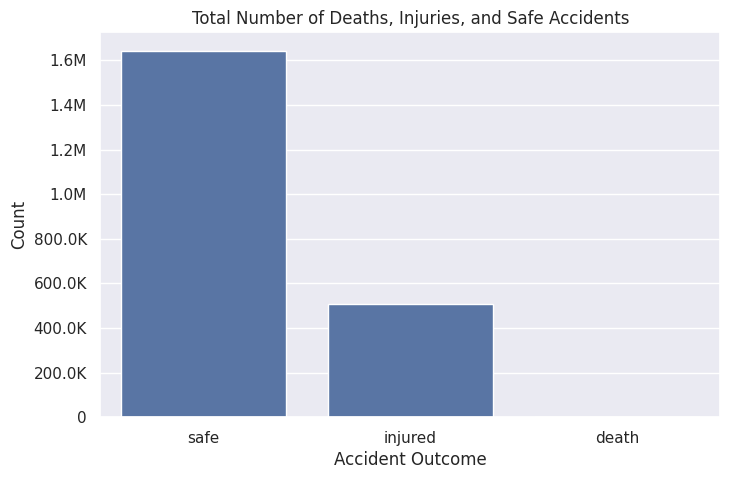

In [31]:
# fill code here to display it by count

import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize": (8,5)})

ax = sns.countplot(data=crashes_subset, x="outcome", order=crashes_subset["outcome"].value_counts().index)

y_ticks = ax.get_yticks()

# manually formatting the y-axis labels for M (millions) and K (thousands)
formatted_labels = []
for y in y_ticks:
    if y >= 1_000_000:
        formatted_labels.append(f"{y/1_000_000:.1f}M")
    elif y >= 1_000:
        formatted_labels.append(f"{y/1_000:.1f}K")
    else:
        formatted_labels.append(str(int(y)))

ax.set_yticklabels(formatted_labels)


ax.set_xlabel("Accident Outcome")
ax.set_ylabel("Count")
ax.set_title("Total Number of Deaths, Injuries, and Safe Accidents")

# printing outcomes to see the exact number of each outcome
# since the number of deaths is very small compared to the other outcomes, it does not appear in the graph
print(crashes_subset["outcome"].value_counts())







Text(0.5, 1.0, 'Percentage of Deaths, Injuries, and Safe Accidents')

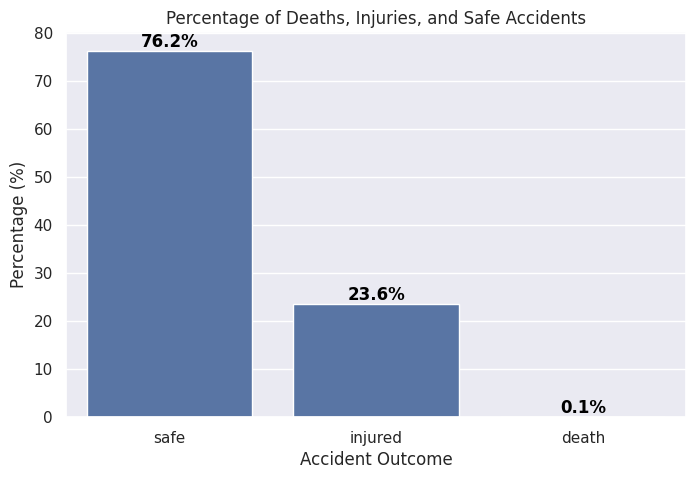

In [32]:
# fill code here to display it by percent

sns.set(rc={"figure.figsize": (8,5)})

outcome_percent = (crashes_subset["outcome"].value_counts(normalize=True)) * 100

outcome_percent_df = outcome_percent.reset_index()
outcome_percent_df.columns = ["outcome", "percentage"]

ax = sns.barplot(data=outcome_percent_df, x="outcome", y="percentage", order=outcome_percent_df["outcome"])

# adding percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Accident Outcome")
ax.set_title("Percentage of Deaths, Injuries, and Safe Accidents")




## Question 7b [1 point]

Lets see if there is a difference in percent of dead/safe/injured by the borough. Create a countplot that displays the percent of dead/safe/injured by borough

Hint: use the hue argument to countplot()

Text(0.5, 1.0, 'Percentage of Safe, Injured, and Dead Accidents by Borough')

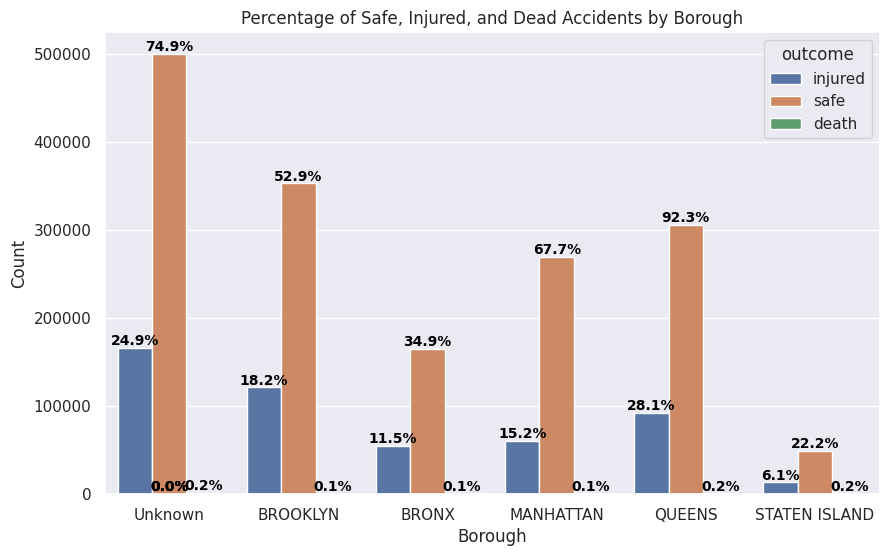

In [33]:
# fill code here to display outcome by borough in terms of percent

borough_percent = crashes_subset.groupby("borough")["outcome"].value_counts(normalize=True).mul(100).rename("percentage")

sns.set(rc={"figure.figsize": (10,6)})

ax = sns.countplot(data=crashes_subset, x="borough", hue="outcome")

borough_totals = crashes_subset["borough"].value_counts()

# adding percentage labels on top of each bar
for p in ax.patches:
    borough = p.get_x()
    count = p.get_height()
    total = borough_totals.iloc[int(borough)]
    percentage = (count / total) * 100

    ax.annotate(f"{percentage:.1f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

ax.set_ylabel("Count")
ax.set_xlabel("Borough")
ax.set_title("Percentage of Safe, Injured, and Dead Accidents by Borough")


## Question 8 [2 points]

Let us take a look at the time series of injuries and deaths. To do this, we will first need to aggregate the data to just the daily level, and then plot it.


In [34]:
# group injury, death by crash_date
# fill code here

daily_counts = crashes_subset.groupby("crash_date")[["injury", "death"]].sum().reset_index()

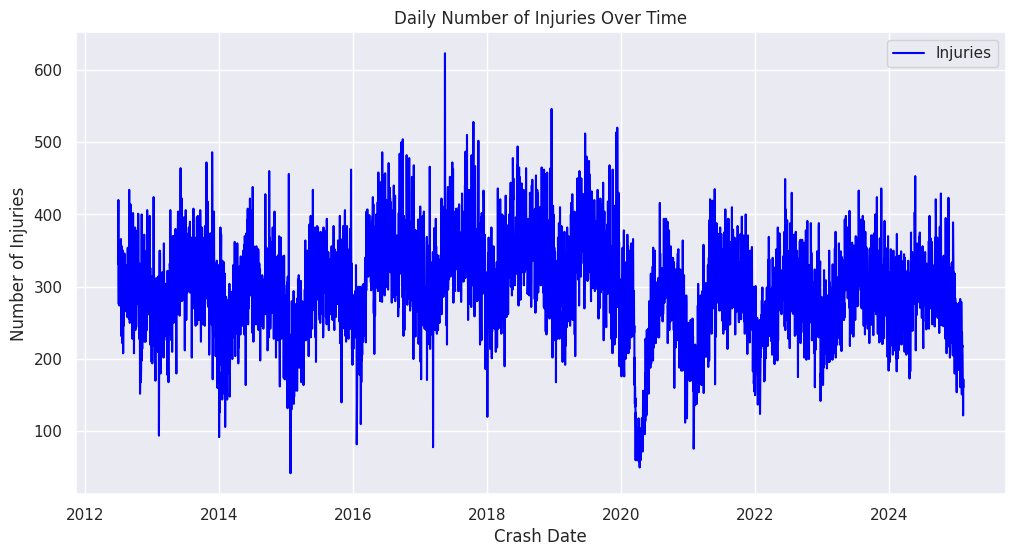

In [35]:
# create a lineplot of injury by crash_date
# fill code here

sns.set(rc={"figure.figsize": (12,6)})

sns.lineplot(data=daily_counts, x="crash_date", y="injury", label="Injuries", color="blue")

plt.xlabel("Crash Date")
plt.ylabel("Number of Injuries")
plt.title("Daily Number of Injuries Over Time")

plt.show()


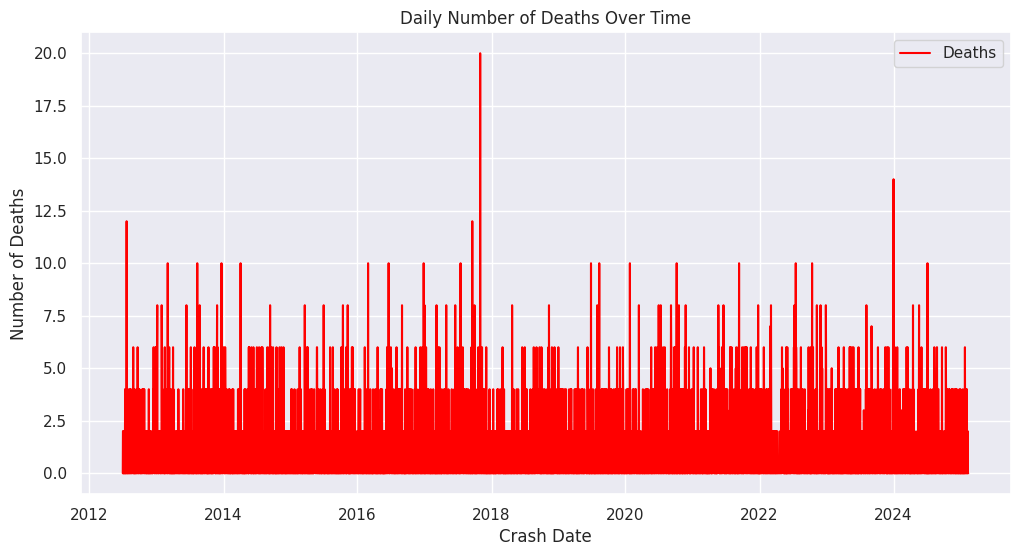

In [36]:
# create a lineplot of death by crash_date
# fill code here

sns.set(rc={"figure.figsize": (12,6)})

sns.lineplot(data=daily_counts, x="crash_date", y="death", label="Deaths", color="red")

plt.xlabel("Crash Date")
plt.ylabel("Number of Deaths")
plt.title("Daily Number of Deaths Over Time")

plt.show()



## Question 9 [2 points]

This is a significantly long period of data, going back to 2012. Lets take a look at the more recent data, from 2018 onwards.

Replicate the charts in question 8 with data limited to 2018 onwards. Do you notice anything?

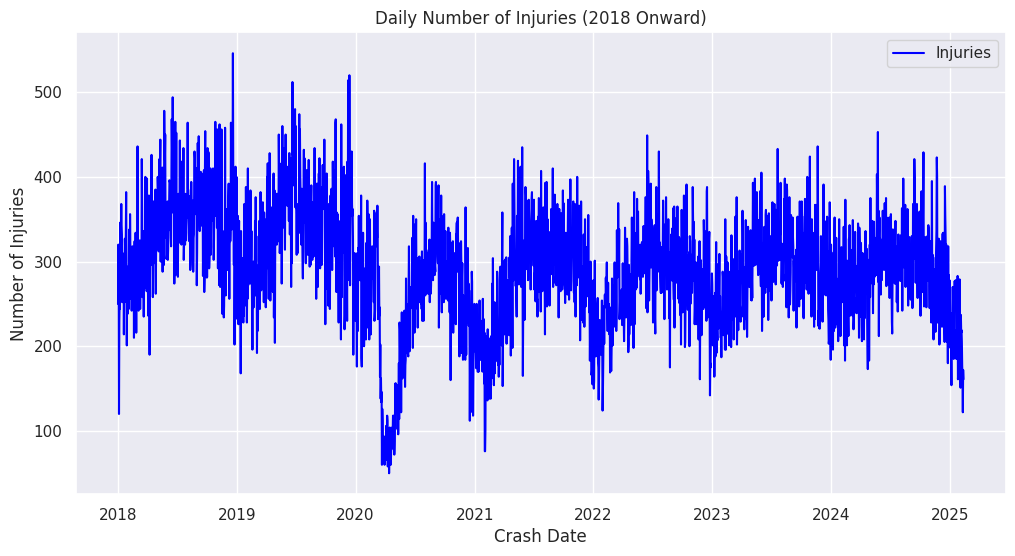

In [37]:
# fill code here to lineplot injury by crash data after 2018

crashes_2018 = crashes_subset[crashes_subset["crash_date"] >= "2018-01-01"]

daily_counts_2018 = crashes_2018.groupby("crash_date")[["injury", "death"]].sum().reset_index()

sns.set(rc={"figure.figsize": (12,6)})

sns.lineplot(data=daily_counts_2018, x="crash_date", y="injury", label="Injuries", color="blue")


plt.xlabel("Crash Date")
plt.ylabel("Number of Injuries")
plt.title("Daily Number of Injuries (2018 Onward)")

plt.show()


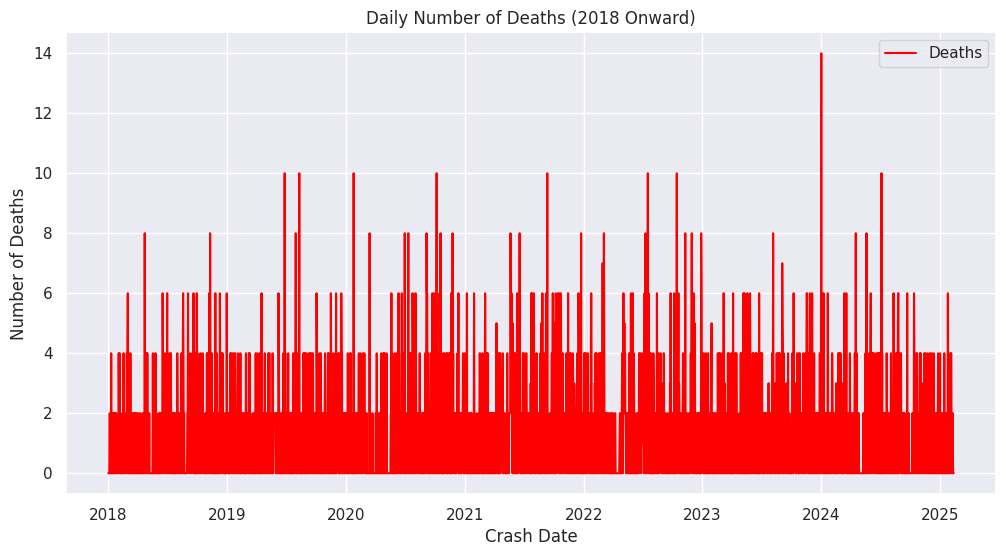

In [38]:
# fill code here to lineplot death by crash data after 2018

sns.lineplot(data=daily_counts_2018, x="crash_date", y="death", label="Deaths", color="red")

plt.xlabel("Crash Date")
plt.ylabel("Number of Deaths")
plt.title("Daily Number of Deaths (2018 Onward)")

plt.show()


## Question 10 [3 points]

Write down three things you have noticed in this data. This could be based on the analysis we have already done, or some new analysis you can think of.

**Solution**

- One of the things I noticed was that the "Unknown" borough accounts for a large share of accidents. When I graphed the borough-based countplot, the category of "Unknown" had a significant percentage of accidents (74.9% safe, and 24.9% injured). This suggested to me that many accidents do not have a reported borough, which could be due to missing or incomplete data from police reports, or accidents that don't exactly fall into one borough, such as accidents that occur on highways, bridges, or tunnels.

- I also noticed that there were seasonal trends in injuries; injuries tend to increase and decrease in a wave-like pattern over the years. This indicates that injuries might increase during certain seasions, due to factors like snowy/icy roads in the winter and increased travel and pedestrian presence in the summer. Also, the number of injuries drastically decreased during 2020, most likely due to the fact that many people stayed inside and did not travel as much as part of the quarantine period during the COVID pandemic.

- On the other hand, the number of deaths over time seems to be more random, since the death line plot did not seem to follow a clear pattern but had sharp spikes on specific days. This could be because deaths tend to be caused by major individual crashes rather than a seasonal trend.

# Principal Component Analysis [20 points]


In this exercise, we will use our theoretical knowledge of PCA to code it using Pandas and numpy. Python provides a very convenient function to do PCA. However, we will not be using that function.

In this exercise, we will be using the [Wine](https://archive.ics.uci.edu/dataset/109/wine) dataset. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )

1) Alcohol  
2) Malic acid  
3) Ash  
4) Alcalinity of ash  
5) Magnesium  
6) Total phenols  
7) Flavanoids  
8) Nonflavanoid phenols  
9) Proanthocyanins  
10)Color intensity  
11)Hue  
12)OD280/OD315 of diluted wines  
13)Proline   

The target variable is `class`.


In [39]:
# read in the dataset from the website.
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [40]:
wine.head()

0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735

In [41]:
wine.shape

(178, 14)

In [42]:
# lets rename the columns to make the data more readable
wine.columns = ['class','alcohol','malic_acid','ash','alcalinity_of_ash',\
                'magnesium','total_phenols','flavanoids','nonflavanoid_phenols',\
                'proanthocyanins', 'color_intensity', 'hue', \
                '0D280_0D315_of_diluted_wines', 'proline']
wine.head()

class  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   color_intensity   hue  0D280_0D315_of_diluted_wines  proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [43]:
wine.dtypes

class                             int64
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                         int64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
0D280_0D315_of_diluted_wines    float64
proline                           int64
dtype: object

This is a well posed classification problem. The task is usually to predict which region a wine comes from, based on its chemical analysis. In this analysis, our focus will not be on prediction, but on identifying the relationships between predictor variables, of which there are 13.

## Question 1 [2 points]

**Describe and visualize the data.**

Calculate the summary statistics for the 13 predictor variables, and create a pairplot of the 13 predictor variables, by class.

Hint: https://seaborn.pydata.org/examples/scatterplot_matrix.html

This will take while to run, since you are trying to visualize 13 pairs of scatterplots.

In [44]:
# fill code here to describe the dataset

wine.describe()

class     alcohol  malic_acid         ash  alcalinity_of_ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       proanthocyanins  color_intensity         hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       0D280_0D315_of_diluted_wines      proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

Do you notice anything about the scale of the variables? Are they all on the same scale?

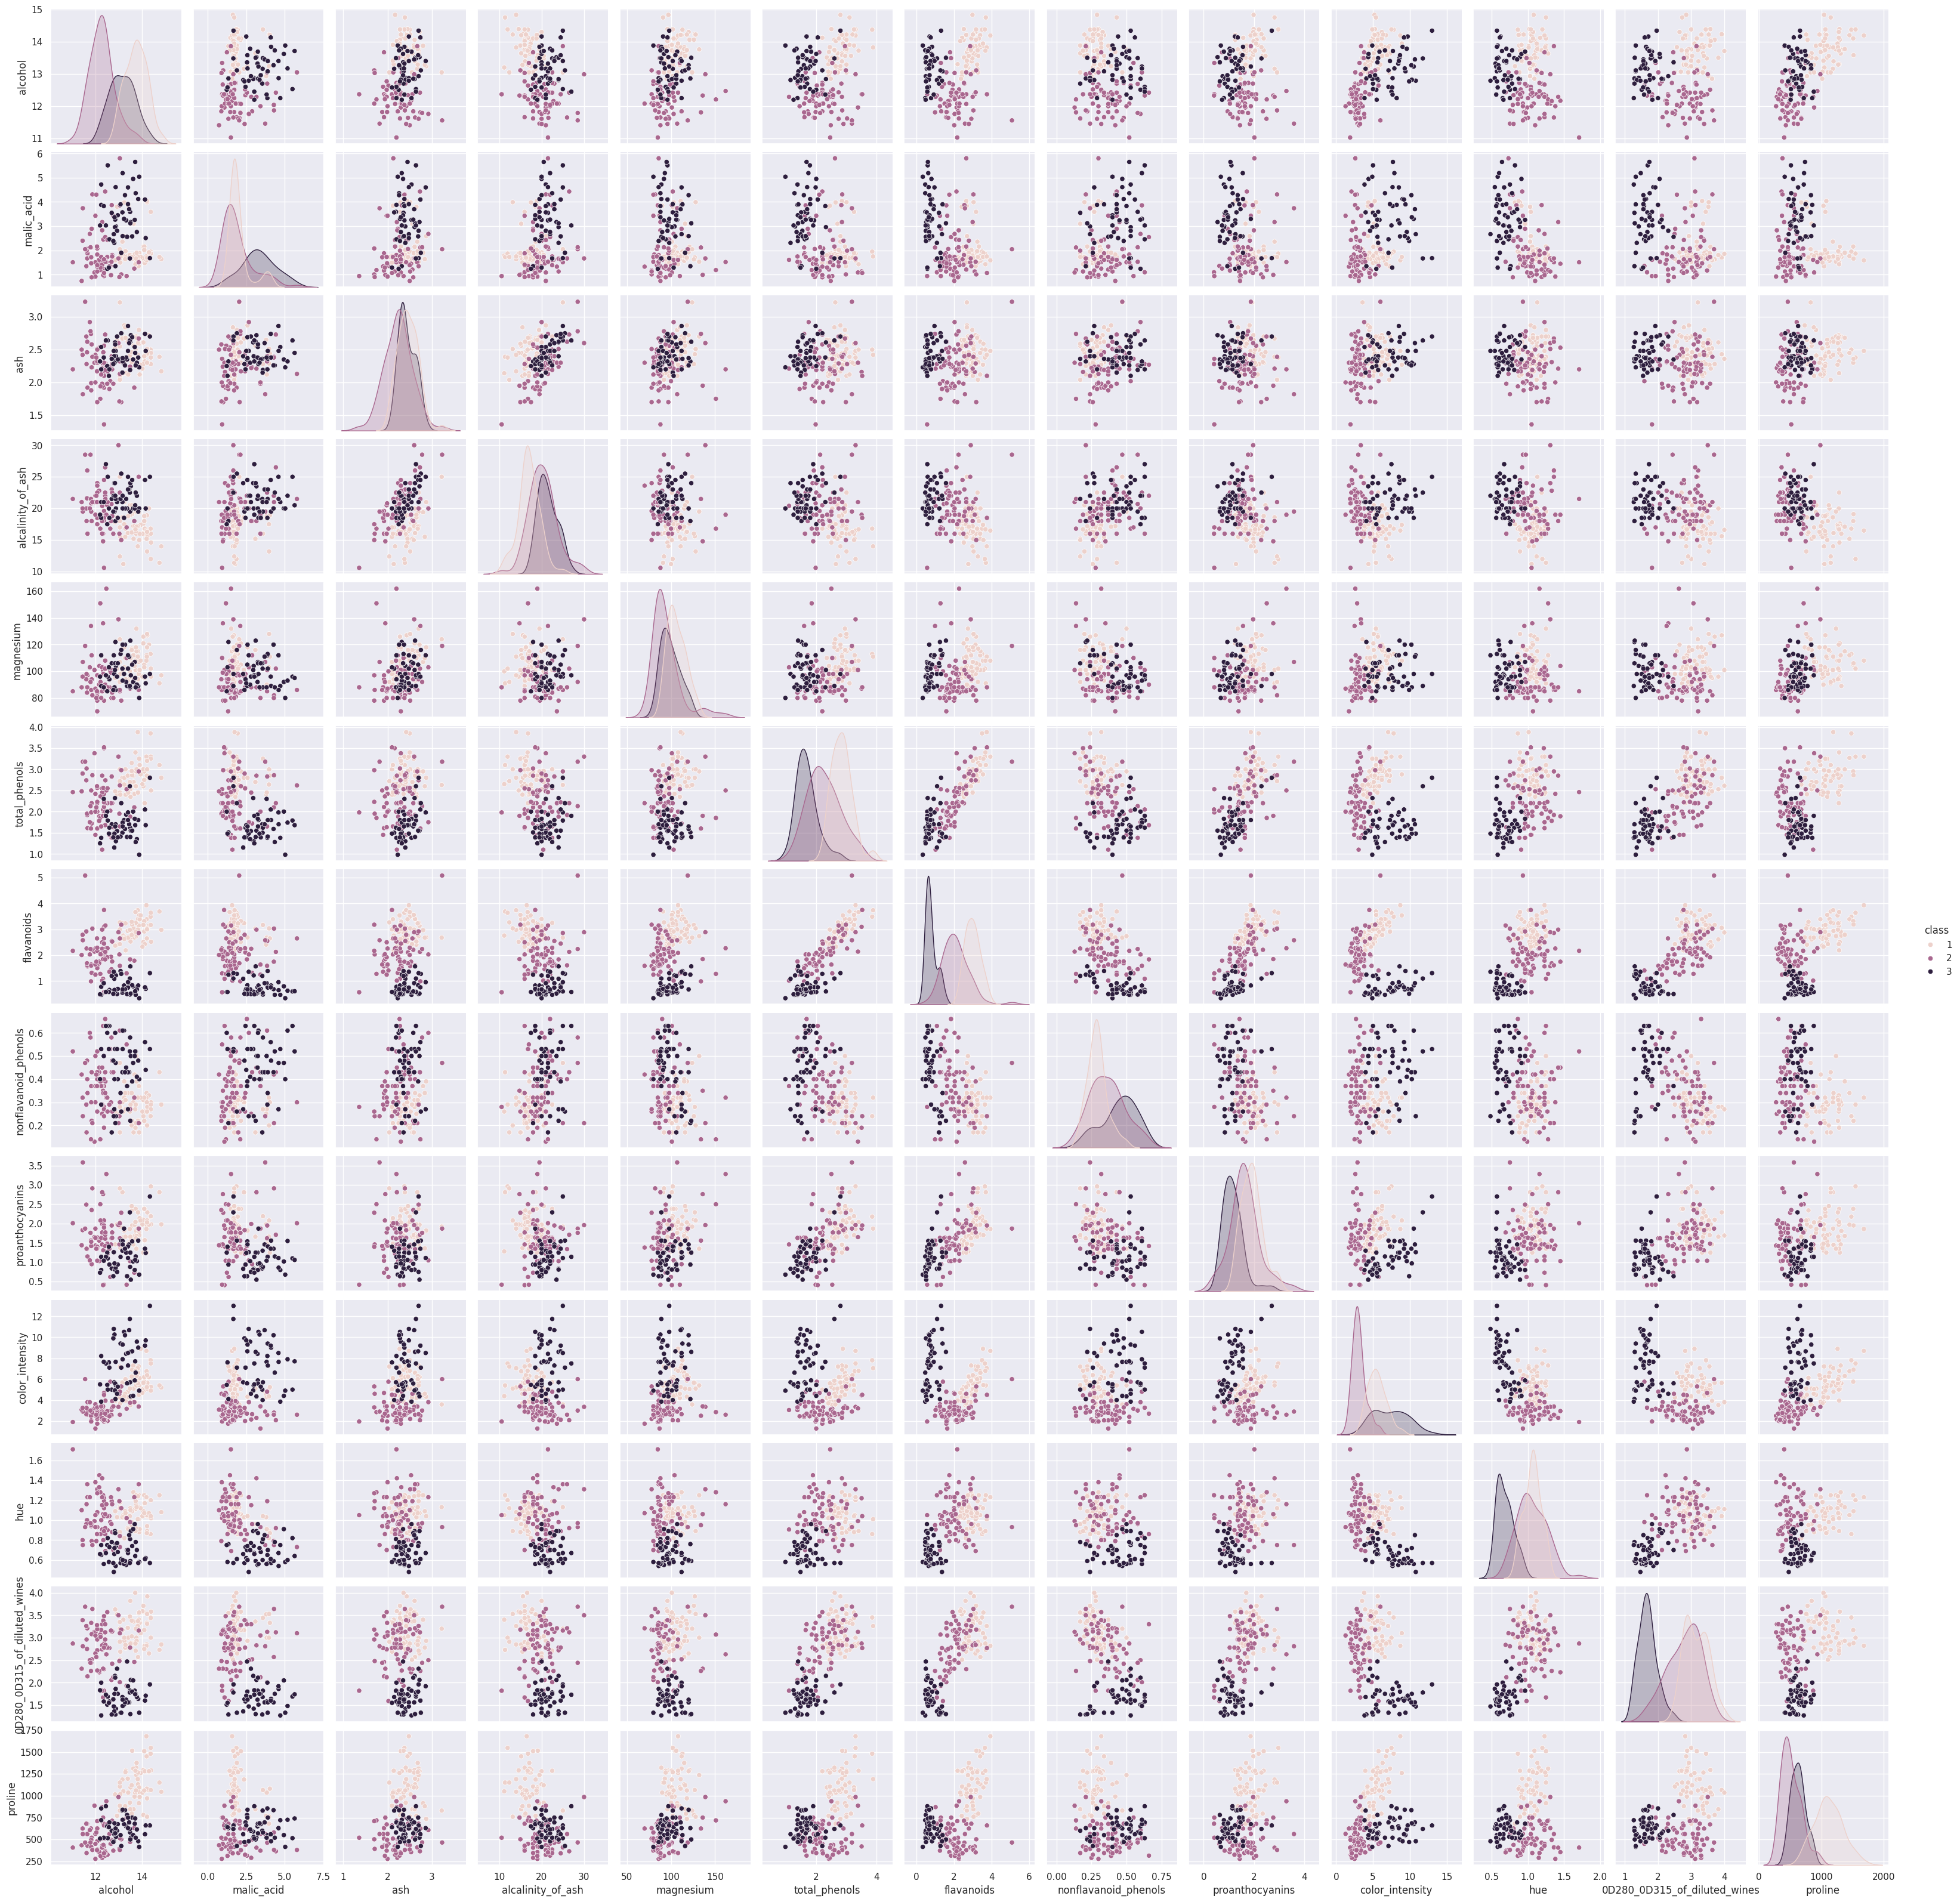

In [45]:
# fill code here to create a pairplot of the 13 predictor variables, set hue to
# class

sns.pairplot(wine, hue="class")

plt.show()

## Question 2 [3 points]

As you can see, it is hard to derive much information from this chart, since there is so many charts here.

An easier way to look at the relationships between the variables would be to look at their correlations.

Let us calculate the covariance matrix for these variables, which we can then turn into the correlation matrix


Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Covariance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

If we standardize the data first by subtracting off the mean, we will be able to get rid of the $\bar x$ terms, and be able to simplify these two equations.

Let $z$ the be mean subtracted data. Then:

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(z_{ij})(z_{ik})$

Covariance matrix: $Σ = \frac{1}{n-1}((Z)^T(Z))$


In [46]:
# now lets follow the steps to implement this.
# lets first create a pandas dataframe with only X variables.. This should be
# all variables in your wine dataset,except the class
X = wine.drop('class', axis=1)


# Next lets subtract the mean of each column from that column
# fill code here
Z = X - X.mean()


In [47]:
# This shows that the mean is 0, but the standard deviation is still not on the
# same scale.
np.round(Z.describe(), 4)

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
count  178.0000    178.0000  178.0000           178.0000   178.0000   
mean    -0.0000     -0.0000   -0.0000            -0.0000    -0.0000   
std      0.8118      1.1171    0.2743             3.3396    14.2825   
min     -1.9706     -1.5963   -1.0065            -8.8949   -29.7416   
25%     -0.6381     -0.7338   -0.1565            -2.2949   -11.7416   
50%      0.0494     -0.4713   -0.0065             0.0051    -1.7416   
75%      0.6769      0.7462    0.1910             2.0051     7.2584   
max      1.8294      3.4637    0.8635            10.5051    62.2584   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count       178.0000    178.0000              178.0000         178.0000   
mean         -0.0000     -0.0000                0.0000          -0.0000   
std           0.6259      0.9989                0.1245           0.5724   
min          -1.3151     -1.6893               -0.2319          -1.1809   
25%          -0.5526     -0.8243               -0.0919          -0.3409   
50%           0.0599      0.1057               -0.0219          -0.0359   
75%           0.5049      0.8457                0.0756           0.3591   
max           1.5849      3.0507                0.2981           1.9891   

       color_intensity       hue  0D280_0D315_of_diluted_wines   proline  
count         178.0000  178.0000                      178.0000  178.0000  
mean            0.0000    0.0000                        0.0000   -0.0000  
std             2.3183    0.2286                        0.7100  314.9075  
min            -3.7781   -0.4774                       -1.3417 -468.8933  
25%            -1.8381   -0.1749                       -0.6742 -246.3933  
50%            -0.3681    0.0076                        0.1683  -73.3933  
75%             1.1419    0.1626                        0.5583  238.1067  
max             7.9419    0.7526                        1.3883  933.1067

<Axes: xlabel='alcohol', ylabel='proline'>

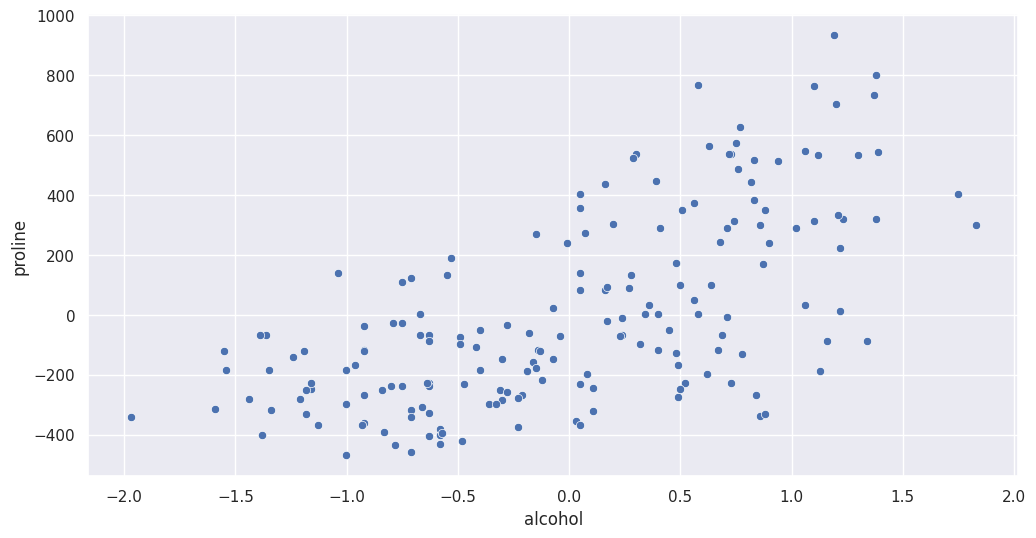

In [48]:
# IF you look at the chart, you will see that proline while still centered
# around zero, has large variations, as compared to alcohol, for example
# we will ignore this problem for now, and come back to it
sns.scatterplot(Z, x='alcohol', y='proline')

In [49]:
# Lets convert this dataset to a numpy array
# fill code here
Z_np = Z.to_numpy()

In [50]:
def covariance_manual(Z: np.array, sample_size: int) -> np.array:
  """Calculates the covariance matrix
  functions
  Args:
    Z: np.array containing the data with mean 0
    sample_size: int describing how large the sample is
  Returns:
    Covariance matrix of Z
  """
  # fill code here
  return (Z.T @ Z) / (sample_size - 1)

In [51]:
# calling the function above to give us a matrix of covariances
covariance_matrix = covariance_manual(Z_np, len(wine))
covariance_matrix

array([[    0.65906233,     0.08561131,     0.04711516,    -0.8410929 ,
            3.13987812,     0.14688722,     0.19203322,    -0.01575426,
            0.06351752,     1.02828254,    -0.01331344,     0.04169782,
          164.56718498],
       [    0.08561131,     1.2480154 ,     0.05027704,     1.07633171,
           -0.87077953,    -0.23433772,    -0.45863037,     0.04073336,
           -0.14114698,     0.64483818,    -0.14332564,    -0.29244748,
          -67.54886657],
       [    0.04711516,     0.05027704,     0.07526464,     0.40620828,
            1.12293658,     0.02214559,     0.03153473,     0.00635847,
            0.00151558,     0.16465433,    -0.00468215,     0.00076184,
           19.3197391 ],
       [   -0.8410929 ,     1.07633171,     0.40620828,    11.15268616,
           -3.97476036,    -0.67114915,    -1.17208281,     0.15042186,
           -0.37717622,     0.14502419,    -0.20911805,    -0.65623437,
         -463.35534501],
       [    3.13987812,    -0.870779

In [52]:
# The numbers here are not easy to read, so lets convert to pandas
# and look at it. You can also see the outsized proline numbers here
pd.DataFrame(covariance_matrix, columns = X.columns, index=X.columns)

alcohol  malic_acid        ash  \
alcohol                         0.659062    0.085611   0.047115   
malic_acid                      0.085611    1.248015   0.050277   
ash                             0.047115    0.050277   0.075265   
alcalinity_of_ash              -0.841093    1.076332   0.406208   
magnesium                       3.139878   -0.870780   1.122937   
total_phenols                   0.146887   -0.234338   0.022146   
flavanoids                      0.192033   -0.458630   0.031535   
nonflavanoid_phenols           -0.015754    0.040733   0.006358   
proanthocyanins                 0.063518   -0.141147   0.001516   
color_intensity                 1.028283    0.644838   0.164654   
hue                            -0.013313   -0.143326  -0.004682   
0D280_0D315_of_diluted_wines    0.041698   -0.292447   0.000762   
proline                       164.567185  -67.548867  19.319739   

                              alcalinity_of_ash    magnesium  total_phenols  \
alcohol                               -0.841093     3.139878       0.146887   
malic_acid                             1.076332    -0.870780      -0.234338   
ash                                    0.406208     1.122937       0.022146   
alcalinity_of_ash                     11.152686    -3.974760      -0.671149   
magnesium                             -3.974760   203.989335       1.916470   
total_phenols                         -0.671149     1.916470       0.391690   
flavanoids                            -1.172083     2.793087       0.540470   
nonflavanoid_phenols                   0.150422    -0.455563      -0.035045   
proanthocyanins                       -0.377176     1.932832       0.219373   
color_intensity                        0.145024     6.620521      -0.079998   
hue                                   -0.209118     0.180851       0.062039   
0D280_0D315_of_diluted_wines          -0.656234     0.669308       0.311021   
proline                             -463.355345  1769.158700      98.171057   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.192033             -0.015754   
malic_acid                     -0.458630              0.040733   
ash                             0.031535              0.006358   
alcalinity_of_ash              -1.172083              0.150422   
magnesium                       2.793087             -0.455563   
total_phenols                   0.540470             -0.035045   
flavanoids                      0.997719             -0.066867   
nonflavanoid_phenols           -0.066867              0.015489   
proanthocyanins                 0.373148             -0.026060   
color_intensity                -0.399169              0.040121   
hue                             0.124082             -0.007471   
0D280_0D315_of_diluted_wines    0.558262             -0.044469   
proline                       155.447492            -12.203586   

                              proanthocyanins  color_intensity        hue  \
alcohol                              0.063518         1.028283  -0.013313   
malic_acid                          -0.141147         0.644838  -0.143326   
ash                                  0.001516         0.164654  -0.004682   
alcalinity_of_ash                   -0.377176         0.145024  -0.209118   
magnesium                            1.932832         6.620521   0.180851   
total_phenols                        0.219373        -0.079998   0.062039   
flavanoids                           0.373148        -0.399169   0.124082   
nonflavanoid_phenols                -0.026060         0.040121  -0.007471   
proanthocyanins                      0.327595        -0.033504   0.038665   
color_intensity                     -0.033504         5.374449  -0.276506   
hue                                  0.038665        -0.276506   0.052245   
0D280_0D315_of_diluted_wines         0.210933        -0.705813   0.091766   
proline                             59.554334       230.76748

In [53]:
# Check: compare this with the inbuilt function, the numbers should match!
X.cov()

alcohol  malic_acid        ash  \
alcohol                         0.659062    0.085611   0.047115   
malic_acid                      0.085611    1.248015   0.050277   
ash                             0.047115    0.050277   0.075265   
alcalinity_of_ash              -0.841093    1.076332   0.406208   
magnesium                       3.139878   -0.870780   1.122937   
total_phenols                   0.146887   -0.234338   0.022146   
flavanoids                      0.192033   -0.458630   0.031535   
nonflavanoid_phenols           -0.015754    0.040733   0.006358   
proanthocyanins                 0.063518   -0.141147   0.001516   
color_intensity                 1.028283    0.644838   0.164654   
hue                            -0.013313   -0.143326  -0.004682   
0D280_0D315_of_diluted_wines    0.041698   -0.292447   0.000762   
proline                       164.567185  -67.548867  19.319739   

                              alcalinity_of_ash    magnesium  total_phenols  \
alcohol                               -0.841093     3.139878       0.146887   
malic_acid                             1.076332    -0.870780      -0.234338   
ash                                    0.406208     1.122937       0.022146   
alcalinity_of_ash                     11.152686    -3.974760      -0.671149   
magnesium                             -3.974760   203.989335       1.916470   
total_phenols                         -0.671149     1.916470       0.391690   
flavanoids                            -1.172083     2.793087       0.540470   
nonflavanoid_phenols                   0.150422    -0.455563      -0.035045   
proanthocyanins                       -0.377176     1.932832       0.219373   
color_intensity                        0.145024     6.620521      -0.079998   
hue                                   -0.209118     0.180851       0.062039   
0D280_0D315_of_diluted_wines          -0.656234     0.669308       0.311021   
proline                             -463.355345  1769.158700      98.171057   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.192033             -0.015754   
malic_acid                     -0.458630              0.040733   
ash                             0.031535              0.006358   
alcalinity_of_ash              -1.172083              0.150422   
magnesium                       2.793087             -0.455563   
total_phenols                   0.540470             -0.035045   
flavanoids                      0.997719             -0.066867   
nonflavanoid_phenols           -0.066867              0.015489   
proanthocyanins                 0.373148             -0.026060   
color_intensity                -0.399169              0.040121   
hue                             0.124082             -0.007471   
0D280_0D315_of_diluted_wines    0.558262             -0.044469   
proline                       155.447492            -12.203586   

                              proanthocyanins  color_intensity        hue  \
alcohol                              0.063518         1.028283  -0.013313   
malic_acid                          -0.141147         0.644838  -0.143326   
ash                                  0.001516         0.164654  -0.004682   
alcalinity_of_ash                   -0.377176         0.145024  -0.209118   
magnesium                            1.932832         6.620521   0.180851   
total_phenols                        0.219373        -0.079998   0.062039   
flavanoids                           0.373148        -0.399169   0.124082   
nonflavanoid_phenols                -0.026060         0.040121  -0.007471   
proanthocyanins                      0.327595        -0.033504   0.038665   
color_intensity                     -0.033504         5.374449  -0.276506   
hue                                  0.038665        -0.276506   0.052245   
0D280_0D315_of_diluted_wines         0.210933        -0.705813   0.091766   
proline                             59.554334       230.76748

## Question 3 [2 points]

The covariance matrix is a good start, but it does not help us with interpretation. This is where the correlation matrix comes into play. By dividing by the standard deviation, it standardizes things, and makes the comparable.

Now that we have the covariance matrix, how do we get to the correlation matrix which is much more informative?

Remember that, to get from the covariance to the correlation, we divide by the standard deviation of each variable. What if we standardize our dataset so that each variable has a standard deviation of 1 (Standardization)?

Then the covariance matrix will just give us the correlation matrix directly!


In [54]:
# lets write code to make this a reality.
# Remember that Z was your dataframe with mean subtracted.
# lets create a new dataframe where each variable is divided by its standard deviation
#fill code here
Z_standardized = Z / Z.std()

In [55]:
# Lets take a look at this new data
np.round(Z_standardized.describe(), 4)

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
count  178.0000    178.0000  178.0000           178.0000   178.0000   
mean    -0.0000      0.0000   -0.0000            -0.0000    -0.0000   
std      1.0000      1.0000    1.0000             1.0000     1.0000   
min     -2.4274     -1.4290   -3.6688            -2.6635    -2.0824   
25%     -0.7860     -0.6569   -0.5705            -0.6872    -0.8221   
50%      0.0608     -0.4219   -0.0238             0.0015    -0.1219   
75%      0.8338      0.6679    0.6961             0.6004     0.5082   
max      2.2534      3.1004    3.1474             3.1456     4.3591   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count       178.0000    178.0000              178.0000         178.0000   
mean          0.0000     -0.0000                0.0000          -0.0000   
std           1.0000      1.0000                1.0000           1.0000   
min          -2.1013     -1.6912               -1.8630          -2.0632   
25%          -0.8830     -0.8252               -0.7381          -0.5956   
50%           0.0957      0.1059               -0.1756          -0.0627   
75%           0.8067      0.8467                0.6078           0.6274   
max           2.5324      3.0542                2.3956           3.4753   

       color_intensity       hue  0D280_0D315_of_diluted_wines   proline  
count         178.0000  178.0000                      178.0000  178.0000  
mean            0.0000    0.0000                        0.0000   -0.0000  
std             1.0000    1.0000                        1.0000    1.0000  
min            -1.6297   -2.0888                       -1.8897   -1.4890  
25%            -0.7929   -0.7654                       -0.9496   -0.7824  
50%            -0.1588    0.0330                        0.2371   -0.2331  
75%             0.4926    0.7112                        0.7864    0.7561  
max             3.4258    3.2924                        1.9554    2.9631

Did you notice what happened to proline? Lets plot it to make it more clear!

<Axes: xlabel='alcohol', ylabel='proline'>

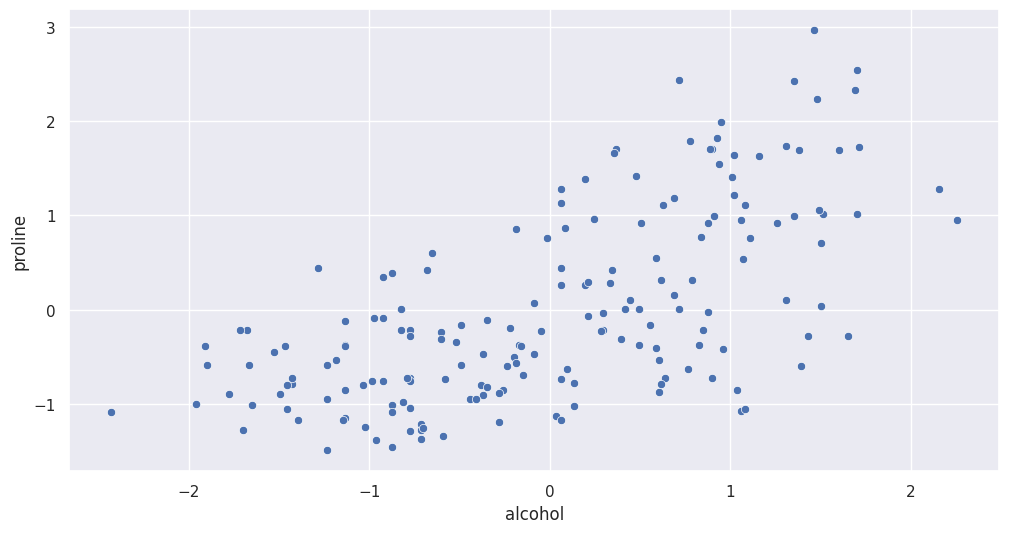

In [56]:
# now these look to be on the same scale!
sns.scatterplot(Z_standardized, x='alcohol', y='proline')

In [57]:
# lets call the covariance_manual function, only this time it will return the
# correlation matrix!

# fill code here
P = covariance_manual(Z_standardized.to_numpy(), len(wine))

In [58]:
# let us make this numpy matrix cleaner to look at
pd.DataFrame(P, columns = X.columns, index=X.columns)

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
0D280_0D315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
0D280_0D315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
0D280_0D315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
0D280_0D315_of_diluted_wines         0.519067        -0.428815  0.565468   
proline                              0.330417         0.316100  0.236183   

                              0D280_0D315_of_diluted_wines   prol

In [59]:
# Check: compare this with the inbuilt function corr().
# You should have the same results
wine.drop('class', axis=1).corr()

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
0D280_0D315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
0D280_0D315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
0D280_0D315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
0D280_0D315_of_diluted_wines         0.519067        -0.428815  0.565468   
proline                              0.330417         0.316100  0.236183   

                              0D280_0D315_of_diluted_wines   prol

## Question 4 [3 points]

Now we are ready to proceed with PCA. We have the covariance matrix of the standardized data that we just calculated above. We will do eigen decomposition of that covariance matrix in this question.

Eigendecomposition of the covariance matrix:  $\Sigma = W\wedge W^{-1}$.

The eigenvectors (principal components) are sorted in descending order based on their corresponding eigenvalues. The eigenvector with the largest eigenvalue captures the most variance, and so on.
You can select the top $k$ eigenvectors based on the highest eigenvalues to reduce the dimensionality while preserving as much variance as possible.

**An important question here is, which covariance matrix do you use? The one obtained after dividing the variables by the standard deviation? Or the one that is only mean centered. Or does this not matter?**

Let us define two distinct datasets that we will use in the rest of this exercise:

1. mean_centered: This is the dataset that is obtained from `wine` by subtracing from each column, the mean of the column.  
2. standardized: This is the mean_centered dataset, but each column is also been divided by the standard deviation of that columns







In [60]:
# You can use the numpy function eig to calculate the eigenvalues, eigenvectors
# fill code here to find them for mean_centered data
eigen_values_mean, eigen_vectors_mean = np.linalg.eig(covariance_manual(Z_np, len(wine)))


# fill code here to find them for standardized data
eigen_values_standardized, eigen_vectors_mean_standardized = np.linalg.eig(P)

In [61]:
# numpy eigen function does not sort the eigenvalues, we have to do it manually
idx = np.argsort(-eigen_values_mean)
eigen_values_mean = eigen_values_mean[idx]
eigen_vectors_mean = eigen_vectors_mean[:,idx]

idx = np.argsort(-eigen_values_standardized)
eigen_values_standardized = eigen_values_standardized[idx]
eigen_vectors_mean_standardized = eigen_vectors_mean_standardized[:,idx]

In [62]:
# lets take a look at these eigenvalues side by side
eigen_values_combined = pd.DataFrame([eigen_values_mean, \
                                      eigen_values_standardized], \
                                     index = ['Mean Centered', 'Standardized'],)
eigen_values_combined = eigen_values_combined.T
eigen_values_combined

Mean Centered  Standardized
0    99201.789517      4.705850
1      172.535266      2.496974
2        9.438114      1.446072
3        4.991179      0.918974
4        1.228845      0.853228
5        0.841064      0.641657
6        0.278974      0.551028
7        0.151381      0.348497
8        0.112097      0.288880
9        0.071703      0.250902
10       0.037576      0.225789
11       0.021072      0.168770
12       0.008204      0.103378

In [63]:
# lets convert this to a percent
eigen_values_combined = eigen_values_combined*100/eigen_values_combined.sum()
eigen_values_combined

Mean Centered  Standardized
0       99.809123     36.198848
1        0.173592     19.207490
2        0.009496     11.123631
3        0.005022      7.069030
4        0.001236      6.563294
5        0.000846      4.935823
6        0.000281      4.238679
7        0.000152      2.680749
8        0.000113      2.222153
9        0.000072      1.930019
10       0.000038      1.736836
11       0.000021      1.298233
12       0.000008      0.795215

As you can tell, these tell completely different stories! If you were to use the mean centered data, the first eigen value is 99% of the total variance!

**Percent of variance**.  

A natural question is, what do these percents represent? We always talk about these as the percent of total variance explained. But what is the total variance?  

Recall, that we started with the 13 predictor variables in the `wine` dataset. These 13 predictor variables had 13 variances, and 13 pairs of covariances with each other. We had put all of this together in what we called the covariance matrix.

The total variance of the wine dataset is just the sum of all the individual variances, without including any of the covariance factors.

What PCA is doing is transforming this data into a new representation, one where the covariances of the data are zero, and the first variable in this new dataset represents a lot of the total variance present in this new dataset. In this case, the first variable in this new dataset is explaining 99.8% of the total variance in the case of mean centered data, and 36.19% in case of the standardized data.

Let us do a check to convince ourselves. Calculate the total variance in the two versions of the wine dataset, the mean centered one, and the standardized one. Then compare that to the sum of the eigenvalues you obtained using each dataset. The numbers should match.







In [64]:
# fill code here to calculate the total variance of the mean centered data, and
# standardized data, and compare it to the sum of the eigenvalues for the two

mean_centered_variance = Z.var().sum()
print(mean_centered_variance)

# mean centered data

99391.50499157325


In [65]:
# fill code here to calculate the total variance of the mean centered data, and
# standardized data, and compare it to the sum of the eigenvalues for the two
standardized_variance = Z_standardized.var().sum()
print(standardized_variance)

print(eigen_values_mean.sum(), eigen_values_standardized.sum())

# standardized data

12.999999999999996
99391.50499157321 13.0


## Taking a look at the eigenvectors

Lets take a look at the eigenvectors

In [66]:
pca_mean_centered = pd.DataFrame(eigen_vectors_mean)
pca_mean_centered.columns = ['PC_' + str(i) for i in range(1, 14)]
pca_mean_centered.index = Z.columns

pca_mean_centered

PC_1      PC_2      PC_3      PC_4  \
alcohol                      -0.001659 -0.001203  0.016874  0.141447   
malic_acid                    0.000681 -0.002155  0.122003  0.160390   
ash                          -0.000195 -0.004594  0.051987 -0.009773   
alcalinity_of_ash             0.004671 -0.026450  0.938593 -0.330965   
magnesium                    -0.017868 -0.999344 -0.029780 -0.005394   
total_phenols                -0.000990 -0.000878 -0.040485 -0.074585   
flavanoids                   -0.001567  0.000052 -0.085443 -0.169087   
nonflavanoid_phenols          0.000123  0.001354  0.013511  0.010806   
proanthocyanins              -0.000601 -0.005004 -0.024659 -0.050121   
color_intensity              -0.002327 -0.015100  0.291398  0.878894   
hue                          -0.000171  0.000763 -0.025978 -0.060035   
0D280_0D315_of_diluted_wines -0.000705  0.003495 -0.070324 -0.178200   
proline                      -0.999823  0.017774  0.004529 -0.003113   

                                  PC_5      PC_6      PC_7      PC_8  \
alcohol                      -0.020337  0.194120 -0.923280  0.284821   
malic_acid                    0.612883  0.742473  0.150110 -0.064674   
ash                          -0.020176  0.041753 -0.045010 -0.149340   
alcalinity_of_ash            -0.064352 -0.024065 -0.031527  0.015154   
magnesium                     0.006149 -0.001924 -0.001797 -0.003552   
total_phenols                -0.315245  0.278717  0.020186 -0.177238   
flavanoids                   -0.524761  0.433598  0.038869 -0.248117   
nonflavanoid_phenols          0.029648 -0.021953  0.004665  0.006498   
proanthocyanins              -0.251183  0.241884  0.309799  0.870433   
color_intensity              -0.331747  0.002740  0.112837 -0.081287   
hue                          -0.051524 -0.023776 -0.030820 -0.002952   
0D280_0D315_of_diluted_wines -0.260639  0.288913 -0.101974 -0.186715   
proline                       0.002299 -0.001212  0.001076  0.000010   

                                  PC_9     PC_10     PC_11     PC_12     PC_13  
alcohol                       0.086601 -0.002245 -0.014972  0.015651  0.008029  
malic_acid                    0.015662 -0.018509 -0.023188 -0.067296 -0.011090  
ash                           0.073650 -0.086800  0.954011  0.132063 -0.173686  
alcalinity_of_ash             0.002045  0.003554 -0.052822 -0.005394  0.001940  
magnesium                    -0.001964 -0.000041 -0.003025 -0.000621  0.002285  
total_phenols                 0.255673  0.847195  0.008802 -0.003883 -0.026691  
flavanoids                    0.378307 -0.520138 -0.133205  0.037488  0.069599  
nonflavanoid_phenols          0.036752  0.037713  0.199179 -0.147552  0.966466  
proanthocyanins              -0.051520  0.009723  0.135621  0.013119 -0.017604  
color_intensity              -0.099029 -0.023147 -0.009820 -0.050356 -0.004633  
hue                           0.033065 -0.038470  0.097511 -0.975562 -0.166551  
0D280_0D315_of_diluted_wines -0.873747  0.017017  0.028485 -0.011630  0.044192  
proline                      -0.000073  0.000049 -0.000240  0.000100  0.000036

In [67]:
pca_standardized = pd.DataFrame(eigen_vectors_mean_standardized)
pca_standardized.columns = ['PC_' + str(i) for i in range(1, 14)]
pca_standardized.index = Z_standardized.columns
pca_standardized

PC_1      PC_2      PC_3      PC_4  \
alcohol                      -0.144329 -0.483652 -0.207383  0.017856   
malic_acid                    0.245188 -0.224931  0.089013 -0.536890   
ash                           0.002051 -0.316069  0.626224  0.214176   
alcalinity_of_ash             0.239320  0.010591  0.612080 -0.060859   
magnesium                    -0.141992 -0.299634  0.130757  0.351797   
total_phenols                -0.394661 -0.065040  0.146179 -0.198068   
flavanoids                   -0.422934  0.003360  0.150682 -0.152295   
nonflavanoid_phenols          0.298533 -0.028779  0.170368  0.203301   
proanthocyanins              -0.313429 -0.039302  0.149454 -0.399057   
color_intensity               0.088617 -0.529996 -0.137306 -0.065926   
hue                          -0.296715  0.279235  0.085222  0.427771   
0D280_0D315_of_diluted_wines -0.376167  0.164496  0.166005 -0.184121   
proline                      -0.286752 -0.364903 -0.126746  0.232071   

                                  PC_5      PC_6      PC_7      PC_8  \
alcohol                       0.265664 -0.213539 -0.056396 -0.396139   
malic_acid                   -0.035214 -0.536814  0.420524 -0.065827   
ash                           0.143025 -0.154475 -0.149171  0.170260   
alcalinity_of_ash            -0.066103  0.100825 -0.286969 -0.427970   
magnesium                    -0.727049 -0.038144  0.322883  0.156361   
total_phenols                 0.149318  0.084122 -0.027925  0.405934   
flavanoids                    0.109026  0.018920 -0.060685  0.187245   
nonflavanoid_phenols          0.500703  0.258594  0.595447  0.233285   
proanthocyanins              -0.136860  0.533795  0.372139 -0.368227   
color_intensity               0.076437  0.418644 -0.227712  0.033797   
hue                           0.173615 -0.105983  0.232076 -0.436624   
0D280_0D315_of_diluted_wines  0.101161 -0.265851 -0.044764  0.078108   
proline                       0.157869 -0.119726  0.076805 -0.120023   

                                  PC_9     PC_10     PC_11     PC_12     PC_13  
alcohol                       0.508619  0.211605 -0.225917  0.266286  0.014970  
malic_acid                   -0.075283 -0.309080  0.076486 -0.121696  0.025964  
ash                          -0.307694 -0.027125 -0.498691  0.049622 -0.141218  
alcalinity_of_ash             0.200449  0.052799  0.479314  0.055743  0.091683  
magnesium                     0.271403  0.067870  0.071289 -0.062220  0.056774  
total_phenols                 0.286035 -0.320131  0.304341  0.303882 -0.463908  
flavanoids                    0.049578 -0.163151 -0.025694  0.042899  0.832257  
nonflavanoid_phenols          0.195501  0.215535  0.116896 -0.042352  0.114040  
proanthocyanins              -0.209145  0.134184 -0.237363  0.095553 -0.116917  
color_intensity               0.056218 -0.290775  0.031839 -0.604222 -0.011993  
hue                           0.085828 -0.522399 -0.048212 -0.259214 -0.089889  
0D280_0D315_of_diluted_wines  0.137227  0.523706  0.046423 -0.600959 -0.156718  
proline                      -0.575786  0.162116  0.539270  0.079402  0.014447

Now we are ready to answer the question: which form of data is better for PCA? Standardized or mean centered?

Recall from class that

$PC_1 = \alpha_1 alcohol + \alpha_2 malic\_acid +... \alpha_{13} proline$

If you look at the two tables above, you see that for mean centered data, PC_1 is almost entirely composed of proline! This is because the variance of proline in mean centered data is very high (just due to the scale).

For standardized data, it is clear, that proline is not the most important component! Lets see how this translates into a real problem.

## Question 5 [5 points]

The ultimate goal of this data analysis would be to identify a way to separate out the three classes of wine using the predictor variables. Using two different versions of the predictor variables (mean centered and standardized), we have been able to obtain some principal components that can help us reduce the dimensionality of the data.

Now let us transform the original data by projecting the data onto the subspace spanned by the principal components.

In [68]:
# fill in code to multiply Z with eigen_vectors_mean
Z_pca_np = np.dot(Z, eigen_vectors_mean)

# lets create a nice looking dataframe out of this
Z_pca = pd.DataFrame(Z_pca_np)
Z_pca.columns = ['PC_' + str(i) for i in range(1, 14)]
# lets add on the class variable
Z_pca['class'] = wine['class']
Z_pca

PC_1       PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0   -318.562979 -21.492131 -3.130735  0.250114 -0.677078  0.568081 -0.619642   
1   -303.097420   5.364718 -6.822835  0.864035  0.486096  0.014340  0.108865   
2   -438.061133   6.537309  1.113223 -0.912411 -0.380651  0.672404  0.785819   
3   -733.240139  -0.192729  0.917257  0.541251 -0.858662  0.599122  0.018770   
4     11.571428 -18.489995  0.554422 -1.360896 -0.276442  0.768884 -0.309976   
..          ...        ...       ...       ...       ...       ...       ...   
173    6.980211   4.541137  2.474707  3.155920  2.348927  1.439001 -0.026425   
174   -3.131605  -2.335191  4.309931  1.562181  1.168003  0.128679  0.003859   
175  -88.458074 -18.776285  2.237577  4.820708  1.057336  0.215000  0.648489   
176  -93.456242 -18.670819  1.788392  3.709352  0.276956 -1.009229  0.414948   
177  186.943190   0.213331  5.630510  3.472987 -0.007035  0.703636 -0.693761   

         PC_8      PC_9     PC_10     PC_11     PC_12     PC_13  class  
0    0.199555 -0.701280 -0.095008  0.088734  0.038548  0.080264      1  
1   -0.604714 -0.286717 -0.045782  0.039778  0.057192  0.013593      1  
2    0.500886 -0.024547 -0.208960  0.237770  0.048798 -0.035408      1  
3   -0.190428 -0.054277  0.531684 -0.096044  0.166353  0.016344      1  
4   -0.119091  0.195843  0.061771  0.316466  0.007118  0.015278      1  
..        ...       ...       ...       ...       ...       ...    ...  
173 -0.043705 -0.040167  0.087377  0.016509 -0.098355  0.027251      3  
174  0.303185  0.159759  0.159510 -0.048916 -0.012626 -0.042645      3  
175 -0.068966 -0.273675 -0.045336 -0.223049 -0.096049  0.036175      3  
176  0.145647 -0.254468  0.059211 -0.030408  0.052089  0.132759      3  
177  0.242247  0.123226  0.299080  0.160725 -0.031920  0.026937      3  

[178 rows x 14 columns]

In [69]:
# fill in code to multiply Z_standardized with eigen_vectors_mean_standardized
Z_standardized_np = np.dot(Z_standardized, eigen_vectors_mean_standardized)

# lets create a nice looking dataframe out of this
Z_standardized_pca = pd.DataFrame(Z_standardized_np)
Z_standardized_pca.columns = ['PC_' + str(i) for i in range(1, 14)]
Z_standardized_pca['class'] = wine['class']
Z_standardized_pca

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0   -3.307421 -1.439402 -0.165273  0.215025 -0.691093 -0.223250  0.594749   
1   -2.203250  0.332455 -2.020757  0.290539  0.256930 -0.924512  0.053624   
2   -2.509661 -1.028251  0.980054 -0.722863  0.250327  0.547731  0.423012   
3   -3.746497 -2.748618 -0.175696 -0.566386  0.310964  0.114109 -0.382259   
4   -1.006070 -0.867384  2.020987  0.408613 -0.297618 -0.405376  0.442825   
..        ...       ...       ...       ...       ...       ...       ...   
173  3.361043 -2.210055 -0.341606 -1.055549  0.572549 -1.105669  0.955720   
174  2.594637 -1.752286  0.206997 -0.348513 -0.254346 -0.026391  0.146480   
175  2.670307 -2.753133 -0.938295 -0.311157 -1.267779  0.272300  0.677325   
176  2.380303 -2.290884 -0.549147  0.686348 -0.811666  1.175467  0.632192   
177  3.199732 -2.761131  1.011062 -0.595224  0.892674  0.295259  0.005725   

         PC_8      PC_9     PC_10     PC_11     PC_12     PC_13  class  
0    0.064956  0.639638  1.018084 -0.450293 -0.539289 -0.066052      1  
1    1.021534 -0.307978  0.159252 -0.142256 -0.387146  0.003626      1  
2   -0.343248 -1.174521  0.113042 -0.285866 -0.000582  0.021655      1  
3    0.641783  0.052397  0.238739  0.757448  0.241339 -0.368444      1  
4    0.415528  0.325900 -0.078146 -0.524466  0.216055 -0.079140      1  
..        ...       ...       ...       ...       ...       ...    ...  
173 -0.145687 -0.022434 -0.303262  0.138836 -0.170305 -0.114105      3  
174 -0.550873 -0.097694 -0.205481  0.257471  0.278645 -0.186844      3  
175  0.046892  0.001219 -0.247300  0.511050 -0.696801  0.071875      3  
176  0.389729  0.057286  0.490107  0.298979 -0.338865 -0.021804      3  
177 -0.292090  0.739574 -0.117637 -0.229317  0.188257 -0.323053      3  

[178 rows x 14 columns]

For each dataset Z_standardized_pca, and Z_pca, create a scatterplot, where x=PC1, y=PC2, and hue is set to the class of the wine.

Which of the two datasets do a better job of separating the two classes using the first two principal components?

<Axes: xlabel='PC_1', ylabel='PC_2'>

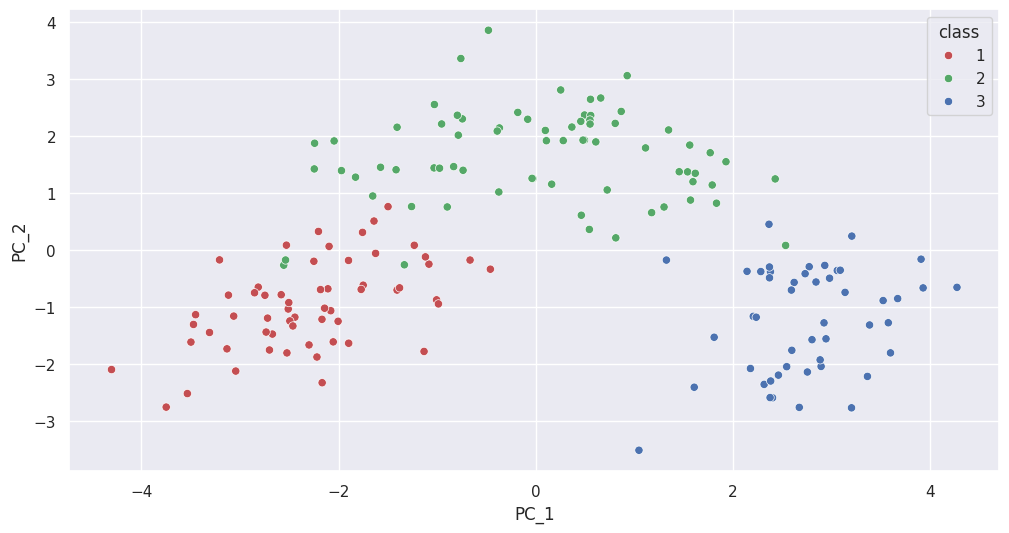

In [70]:
sns.scatterplot(Z_standardized_pca, x='PC_1', y='PC_2', hue='class', palette=['r','g','b'])

<Axes: xlabel='PC_1', ylabel='PC_2'>

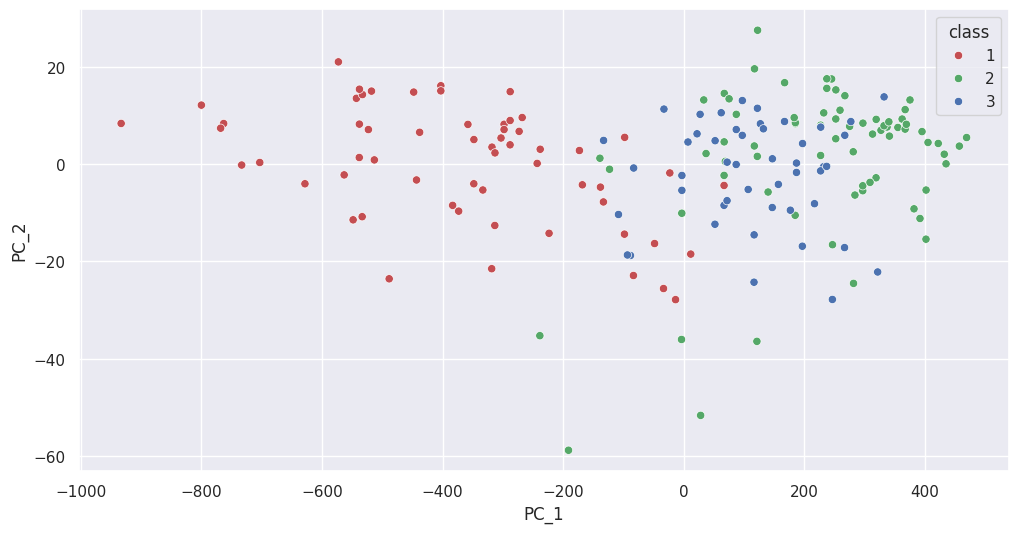

In [71]:
sns.scatterplot(Z_pca, x='PC_1', y='PC_2', hue='class', palette=['r','g','b'])

## Question 6 [5 points]

Python provides convenient libraries to do all of the steps we just above. Lets repeat the analysis using the provided libraries.

1. Using StandardScaler from the sklearn.preprocessing library, transform the 13 predictor variables in your wine dataset so that they have zero mean and unit standard deviation.  
2. Using the PCA library from sklearn.decomposition, perform PCA on the 13 predictor variables in the wine dataset. Report the percent of variance explained by the first 2 prinicipal components

You can look at the code samples [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py) to do this


In [72]:
from sklearn import preprocessing
from sklearn import decomposition

In [73]:
# define your X variables
X_df = wine.drop('class', axis=1)

In [74]:
# fill code here to standardize the data using StandardScaler()

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X_df)


In [75]:
# fill code here to do PCA using the sklearn PCA() function

# Apply PCA
pca = decomposition.PCA()
X_pca = pca.fit_transform(X_scaled)  # Transform the data into principal components

In [76]:
# fill code to find the percent of explained variance by the first two principal
# components. HOw does this compared to your manual analysis

explained_variance = pca.explained_variance_ratio_ * 100

print(f"Variance explained by PC1: {explained_variance[0]:.2f}%")
print(f"Variance explained by PC2: {explained_variance[1]:.2f}%")

Variance explained by PC1: 36.20%
Variance explained by PC2: 19.21%


### Obtain the transformed data

Transform your original X_scaled to the prinicipal components. Note that the transform function returns a numpy array. Convert to pandas dataframe. Append the class variable to this dataset and then create a scatterplot of PC1 and PC2, and the 3 wine classes

In [77]:
# fill code here to transform the original data using the principal components
X_scaled_pca = pd.DataFrame(pca.transform(X_scaled))


In [78]:
# Naming the columns
X_scaled_pca.columns = ['PC_' + str(i) for i in range(1, 14)]
X_scaled_pca['class'] = wine['class']

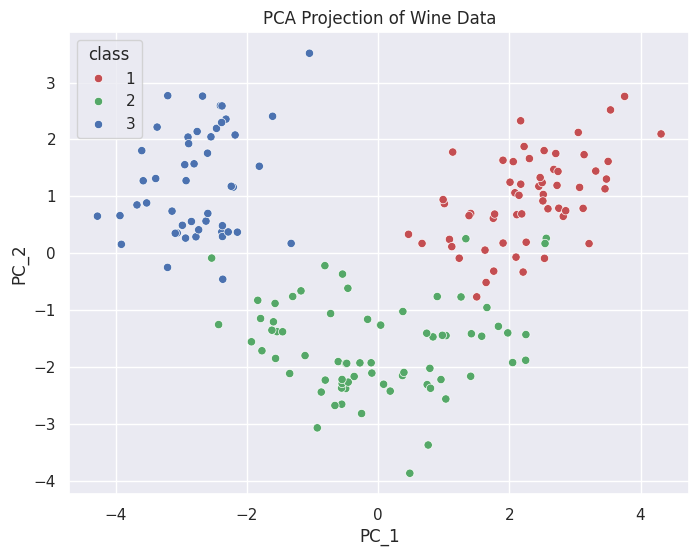

In [79]:
# fill code here to plot PC_1 and PC_2 and see if they can separate the class

plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_scaled_pca, x='PC_1', y='PC_2', hue='class', palette=['r', 'g', 'b'])

plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.title("PCA Projection of Wine Data")

plt.show()

# Sum of EigenValues [5 points]

In the above example, we saw that the sum of eigenvalues is equal to the sum of all variances in the data. Let X be a data matrix. Prove that the sum of the variances of X is equal to the sum of eigenvalues of Cov(X) using matrix properties

**Solution**  


First , we let $X$ be a dataset with $n$ observations and $p$ features. Then, covariance matrix of $X$, denoted as $\Sigma$, is:

$$\Sigma = \frac{1}{n-1} X^T X$$

This means that the total variance of the dataset is given by the sum of the variances of all individual features, which corresponds to the trace of the covariance matrix:

$$\text{Total Variance} = \sum_{i=1}^{p} \text{Var}(X_i) = \sum_{i=1}^{p} \Sigma_{ii}$$

$\Sigma_{ii}$ represents the diagonal elements of $\Sigma$.

Since $\Sigma$ is a symmetric and positive semi-definite matrix, it can be decomposed into its eigenvalues:
$$\Sigma = Q \Lambda Q^T$$

where $Q$ is an orthogonal matrix (containing eigenvectors) and $\Lambda$ is a diagonal matrix containing the eigenvalues $\lambda_1, \lambda_2, \dots, \lambda_p$.

Taking the trace on both sides:
$$\text{Tr}(\Sigma) = \text{Tr}(\Lambda)$$

Since the trace of a matrix is the sum of its diagonal elements, we get:

$$\sum_{i=1}^{p} \Sigma_{ii} = \sum_{i=1}^{p} \lambda_i$$

which confirms that the sum of the eigenvalues of the covariance matrix is equal to the sum of the variances of the original features.

Thus, we proved that:
$$\sum_{i=1}^{p} \lambda_i = \sum_{i=1}^{p} \text{Var}(X_i)$$

which shows that the sum of the eigenvalues of the covariance matrix is equal to the total variance in the dataset.


# Open Ended Real World Dataset Merging [20 points]

Select two publicly available datasets that help you answer a question that one dataset alone cannot. Some sources are listed below, but you are allowed to find any two datasets that are publicly available:

https://www.kaggle.com/datasets

https://data.gov/

https://archive.ics.uci.edu/

https://paperswithcode.com/datasets

https://openml.org/search?type=data&sort=runs&status=active


**Define the problem** through a clear analytics problem statement. Note that you can frame this problem any way you want, but since we have not covered prediction algorithms yet, frame the problem you can solve with the tools you have learned so far. The problem should only be solvable because you combined two different datasets.

Apply and document the **data pre-processing algorithms** applied to the datasets used in your project.

Apply data cleaning and dimensionality reduction to your data.

Use tables, charts, and graphs to provide evidence for answering your original question.

**You do not need to write a full fledged report, but you should document and explain what you are doing in the code in this colab itself. Remember to include relevant graphs, tables, results that help answer the question you came up with. You must include a link to the datasources that you used for the analysis**



In [80]:
from google.colab import files
uploaded = files.upload()

Saving spotify_history.csv to spotify_history.csv
Saving Most popular 1000 Youtube videos.csv to Most popular 1000 Youtube videos.csv


In [84]:
# Links to my data sources:
# Spotify Streaming History Dataset: https://www.kaggle.com/datasets/sgoutami/spotify-streaming-history
# Most Popular 1000 Youtube Videos Dataset: https://www.kaggle.com/datasets/samithsachidanandan/most-popular-1000-youtube-videos

# loading Spotify dataset
spotify_df = pd.read_csv("spotify_history.csv")

# loading YouTube dataset
youtube_df = pd.read_csv("Most popular 1000 Youtube videos.csv")

# display first few rows
display(spotify_df.head(), youtube_df.head())


spotify_track_uri                   ts    platform  ms_played  \
0  2J3n32GeLmMjwuAzyhcSNe  2013-07-08 02:44:34  web player       3185   
1  1oHxIPqJyvAYHy0PVrDU98  2013-07-08 02:45:37  web player      61865   
2  487OPlneJNni3NWC8SYqhW  2013-07-08 02:50:24  web player     285386   
3  5IyblF777jLZj1vGHG2UD3  2013-07-08 02:52:40  web player     134022   
4  0GgAAB0ZMllFhbNc3mAodO  2013-07-08 03:17:52  web player          0   

                                      track_name        artist_name  \
0                            Say It, Just Say It       The Mowgli's   
1  Drinking from the Bottle (feat. Tinie Tempah)      Calvin Harris   
2                                    Born To Die       Lana Del Rey   
3                               Off To The Races       Lana Del Rey   
4                                      Half Mast  Empire Of The Sun   

                           album_name reason_start reason_end  shuffle  \
0                Waiting For The Dawn     autoplay   clickrow    False   
1                           18 Months     clickrow   clickrow    False   
2  Born To Die - The Paradise Edition     clickrow    unknown    False   
3  Born To Die - The Paradise Edition    trackdone   clickrow    False   
4                  Walking On A Dream     clickrow    nextbtn    False   

   skipped  
0    False  
1    False  
2    False  
3    False  
4    False

rank                                              Video    Video views  \
0     1  Lil Nas X - Old Town Road (Official Movie) ft....     54,071,677   
1     2  20 Tennis shots if they were not filmed, NOBOD...      3,471,237   
2     3                 JoJo Siwa - Karma (Official Video)     34,206,747   
3     4    David Kushner - Daylight (Official Music Video)     18,558,390   
4     5  Wiz Khalifa - See You Again ft. Charlie Puth [...  6,547,981,039   

        Likes Dislikes Category  published  
0   3,497,955   78,799    Music       2019  
1      19,023      859      NaN       2017  
2     293,563      NaN    Music       2024  
3     680,732      NaN    Music       2023  
4  44,428,537      NaN    Music       2015

**Problem Statement:**

The overall question I would like to answer using these two datasets is whether we can identify trands in music popularity across streaming platforms. Specifically, do the most popular YouTube music videos correspond to the most streamed songs on Spotify, and how does user behavior differ between plaforms?

This question is solvable only because I am combining both datasets, since one dataset provides video popularity metrics, and the other provides music streaming data.

In [85]:
# First step: Data Preprocessing & Cleaning

# first, I'm checking for missing values:
print(spotify_df.isnull().sum())
print(youtube_df.isnull().sum())

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64
rank             0
Video            0
Video views      0
Likes            0
Dislikes       473
Category        18
published        0
dtype: int64


In [86]:
# converting numerical columns in YouTube dataset (removing commas)
youtube_df['Video views'] = youtube_df['Video views'].str.replace(',', '').astype(float)
youtube_df['Likes'] = youtube_df['Likes'].str.replace(',', '').astype(float)

# handling missing values in both datasets
spotify_df.fillna({'reason_start': 'unknown', 'reason_end': 'unknown'}, inplace=True)
youtube_df.drop(columns=['Dislikes'], inplace=True)

# removing duplicates
spotify_df.drop_duplicates(inplace=True)
youtube_df.drop_duplicates(inplace=True)

# display cleaned datasets
display(spotify_df.head(), youtube_df.head())


spotify_track_uri                   ts    platform  ms_played  \
0  2J3n32GeLmMjwuAzyhcSNe  2013-07-08 02:44:34  web player       3185   
1  1oHxIPqJyvAYHy0PVrDU98  2013-07-08 02:45:37  web player      61865   
2  487OPlneJNni3NWC8SYqhW  2013-07-08 02:50:24  web player     285386   
3  5IyblF777jLZj1vGHG2UD3  2013-07-08 02:52:40  web player     134022   
4  0GgAAB0ZMllFhbNc3mAodO  2013-07-08 03:17:52  web player          0   

                                      track_name        artist_name  \
0                            Say It, Just Say It       The Mowgli's   
1  Drinking from the Bottle (feat. Tinie Tempah)      Calvin Harris   
2                                    Born To Die       Lana Del Rey   
3                               Off To The Races       Lana Del Rey   
4                                      Half Mast  Empire Of The Sun   

                           album_name reason_start reason_end  shuffle  \
0                Waiting For The Dawn     autoplay   clickrow    False   
1                           18 Months     clickrow   clickrow    False   
2  Born To Die - The Paradise Edition     clickrow    unknown    False   
3  Born To Die - The Paradise Edition    trackdone   clickrow    False   
4                  Walking On A Dream     clickrow    nextbtn    False   

   skipped  
0    False  
1    False  
2    False  
3    False  
4    False

rank                                              Video   Video views  \
0     1  Lil Nas X - Old Town Road (Official Movie) ft....  5.407168e+07   
1     2  20 Tennis shots if they were not filmed, NOBOD...  3.471237e+06   
2     3                 JoJo Siwa - Karma (Official Video)  3.420675e+07   
3     4    David Kushner - Daylight (Official Music Video)  1.855839e+07   
4     5  Wiz Khalifa - See You Again ft. Charlie Puth [...  6.547981e+09   

        Likes Category  published  
0   3497955.0    Music       2019  
1     19023.0      NaN       2017  
2    293563.0    Music       2024  
3    680732.0    Music       2023  
4  44428537.0    Music       2015

In [87]:
# since we want to compare streamed Spotify songs to YouTube music videos, I am filtering the YouTube dataset to include only music videos
youtube_music_df = youtube_df[youtube_df['Category'] == 'Music']

# display filtered YouTube dataset
print("Filtered YouTube dataset (Only Music Category):")
display(youtube_music_df.head())

# Now, I am merging the datasets based on song (i.e., keeping only music-related data)
# Here, I am making sure both datasets have a comparable column for merging
merged_df = pd.merge(spotify_df, youtube_music_df, left_on="track_name", right_on="Video", how="inner")

# display the merged dataset
print("Merged Spotify & YouTube Music Dataset:")
display(merged_df.head())


Filtered YouTube dataset (Only Music Category):


rank                                              Video   Video views  \
0     1  Lil Nas X - Old Town Road (Official Movie) ft....  5.407168e+07   
2     3                 JoJo Siwa - Karma (Official Video)  3.420675e+07   
3     4    David Kushner - Daylight (Official Music Video)  1.855839e+07   
4     5  Wiz Khalifa - See You Again ft. Charlie Puth [...  6.547981e+09   
5     6  JP Saxe - If the World Was Ending (Official Vi...  7.683450e+07   

        Likes Category  published  
0   3497955.0    Music       2019  
2    293563.0    Music       2024  
3    680732.0    Music       2023  
4  44428537.0    Music       2015  
5    804353.0    Music       2019

Merged Spotify & YouTube Music Dataset:


spotify_track_uri                   ts platform  ms_played track_name  \
0  3IED76o87zKWeqBz3xB2mV  2014-01-07 22:35:32  windows      25227    Feel It   
1  1uRBbjQ3uNFXCncWyNomHf  2018-11-14 22:41:36  android     106764       Only   
2  1uRBbjQ3uNFXCncWyNomHf  2018-11-14 22:43:40  android      75178       Only   
3  1uRBbjQ3uNFXCncWyNomHf  2018-11-15 19:01:13  android     180733       Only   
4  1uRBbjQ3uNFXCncWyNomHf  2018-11-16 01:00:52  android      46743       Only   

       artist_name  album_name reason_start reason_end  shuffle  skipped  \
0           Karmon  Feel It EP       fwdbtn    unknown    False     True   
1  Imagine Dragons     Origins    trackdone     logout    False    False   
2  Imagine Dragons     Origins      appload  trackdone    False    False   
3  Imagine Dragons     Origins    trackdone  trackdone     True    False   
4  Imagine Dragons     Origins    trackdone     fwdbtn     True    False   

   rank    Video  Video views   Likes Category  published  
0   720  Feel It     389735.0  6511.0    Music       2020  
1   741     Only     879027.0  6045.0    Music       2024  
2   741     Only     879027.0  6045.0    Music       2024  
3   741     Only     879027.0  6045.0    Music       2024  
4   741     Only     879027.0  6045.0    Music       2024

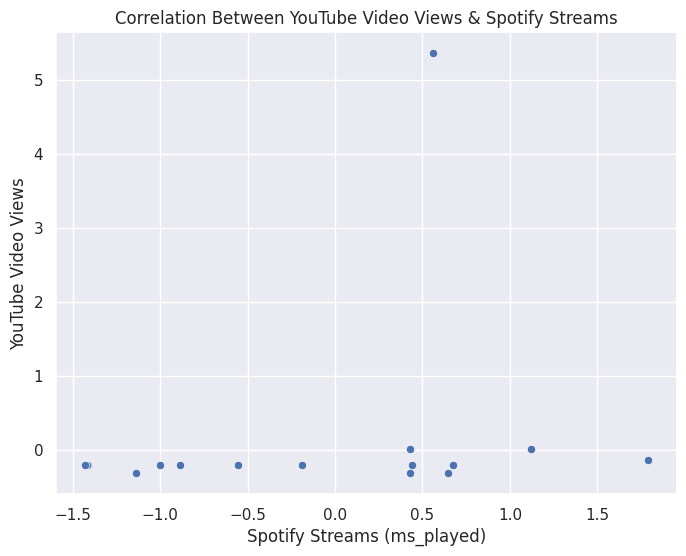

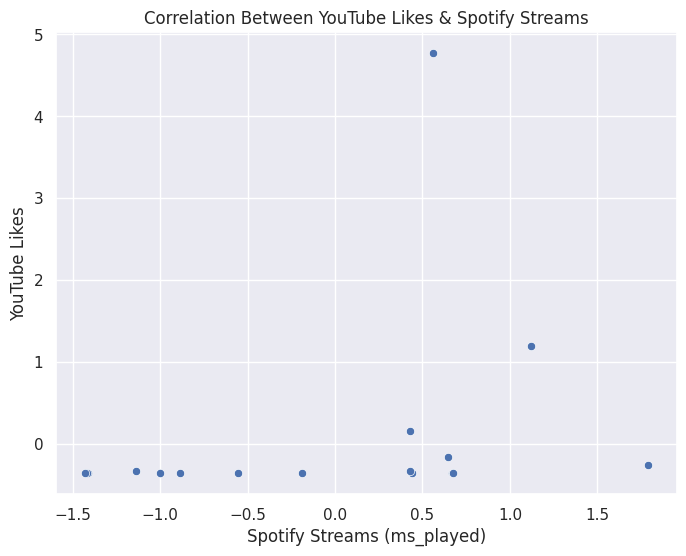

In [90]:
# Second step: Data Analysis & Visualization

# selecting relevant columns for analysis
merged_df = merged_df[["track_name", "artist_name", "ms_played", "Video views", "Likes"]]

# standardizing the numerical features
scaler = preprocessing.StandardScaler()
merged_df[['ms_played', 'Video views', 'Likes']] = scaler.fit_transform(merged_df[['ms_played', 'Video views', 'Likes']])

# creating a plot showing YouTube video views vs Spotify streams
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x="ms_played", y="Video views")
plt.xlabel("Spotify Streams (ms_played)")
plt.ylabel("YouTube Video Views")
plt.title("Correlation Between YouTube Video Views & Spotify Streams")
plt.show()

# creating a plot showing YouTube likes vs Spotify streams
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x="ms_played", y="Likes")
plt.xlabel("Spotify Streams (ms_played)")
plt.ylabel("YouTube Likes")
plt.title("Correlation Between YouTube Likes & Spotify Streams")
plt.show()

In [91]:
# identifying most popular songs on both platforms
merged_df["Total Popularity"] = merged_df["ms_played"] + merged_df["Video views"]
top_songs = merged_df.sort_values(by="Total Popularity", ascending=False).head(10)

# display the top songs
print("Top 10 Most Popular Songs (Based on Combined Metrics):")
display(top_songs[["track_name", "artist_name", "ms_played", "Video views", "Likes"]])

Top 10 Most Popular Songs (Based on Combined Metrics):


track_name        artist_name  ms_played  Video views     Likes
18   Whiplash  Theophilus London   0.561615     5.366550  4.771263
28       Seen      Kings of Leon   1.790815    -0.132944 -0.254361
24    Imagine       Jack Johnson   1.122683     0.007064  1.192587
26    Imagine       Jack Johnson   1.122683     0.007064  1.192587
23    Imagine       Jack Johnson   1.122683     0.007064  1.192587
29       Only    Imagine Dragons   0.675696    -0.205975 -0.353762
8        Only    Imagine Dragons   0.675696    -0.205975 -0.353762
13       Only    Imagine Dragons   0.675696    -0.205975 -0.353762
21       Only    Imagine Dragons   0.675696    -0.205975 -0.353762
7        Only    Imagine Dragons   0.675696    -0.205975 -0.353762

In [92]:
# since the scatterplots above don't tell us much, I am computing correlation coefficients
correlation_views = merged_df['ms_played'].corr(merged_df['Video views'])
correlation_likes = merged_df['ms_played'].corr(merged_df['Likes'])

print(f"Correlation between Spotify Streams and YouTube Video Views: {correlation_views:.3f}")
print(f"Correlation between Spotify Streams and YouTube Likes: {correlation_likes:.3f}")

Correlation between Spotify Streams and YouTube Video Views: 0.136
Correlation between Spotify Streams and YouTube Likes: 0.287


In [99]:
# identifying top songs on Spotify
top_spotify = spotify_df.nlargest(10, 'ms_played')[['track_name', 'artist_name', 'ms_played']]
print("Top 10 Songs on Spotify:")
display(top_spotify)

# identifying top songs on YouTube
top_youtube = youtube_music_df.nlargest(10, 'Video views')[['Video', 'Video views', 'Likes']]
print("Top 10 Songs on YouTube:")
display(top_youtube)

Top 10 Songs on Spotify:


track_name      artist_name  ms_played
94634                  Tubular Bells - Pt. I    Mike Oldfield    1561125
94635                 Tubular Bells - Pt. II    Mike Oldfield    1397146
17995   Nothing Left To Say / Rocks - Medley  Imagine Dragons    1319375
129895                        Desolation Row        Bob Dylan    1209343
146949                         Human Sadness        The Voidz    1142390
101301              Epilogue (Finale) - Live   Colm Wilkinson    1082458
34166                                   Dogs       Pink Floyd    1025280
76278                                   Dogs       Pink Floyd    1025280
92652                                   Dogs       Pink Floyd    1025280
95668                                   Dogs       Pink Floyd    1025280

Top 10 Songs on YouTube:


Video   Video views  \
4    Wiz Khalifa - See You Again ft. Charlie Puth [...  6.547981e+09   
60   Pedro Capó, Farruko - Calma (Remix - Official ...  2.964195e+09   
381  Jhay Cortez, J. Balvin, Bad Bunny - No Me Cono...  2.356629e+09   
136  ROSALÍA, J Balvin - Con Altura (Official Video...  2.209875e+09   
384                                         RickRoll'D  7.817810e+07   
5    JP Saxe - If the World Was Ending (Official Vi...  7.683450e+07   
25   Olivia Rodrigo - drivers license (Official Video)  6.822498e+07   
0    Lil Nas X - Old Town Road (Official Movie) ft....  5.407168e+07   
854           Preme - DnF (Explicit) ft. Drake, Future  4.966813e+07   
317                 Darell - Lollipop (Official Video)  4.715438e+07   

          Likes  
4    44428537.0  
60   13755637.0  
381   6622023.0  
136   9768545.0  
384    318037.0  
5      804353.0  
25    3810456.0  
0     3497955.0  
854    255859.0  
317    381348.0

**Analysis of Results**

1. Correlation between YouTube video views and Spotify streams:
- The scatterplots and computed correlation values show a weak positive correlation (approximately 0.136). This suggests that while there is some relationship between a song's popularity on YouTube and its streams on Spotify, it is not strong. A song that has many views on YouTube does not necessarily have an equivalent number of streams on Spotify.

2. Correlation between YouTube Likes and Spotify Streams
- The correlation between YouTube likes and Spotify streams is slightly higher than the correlation between YouTube video views and Spotify streams (0.287). This indicates that song with more likes on YouTube tend to have somewhat more streams on Spotify, but again, the relationship is weak.

3. The top 10 most popular song across both platforms
- The ranking of songs based on a combined popularit metric (sum of Spotify streams and YouTube views) reveals which songs are most successful across both platforms. Some songs appear to perform well on both platforms, while others are dominant on just one.

4. The top 10 songs on each platform
- The most streamed songs on Spotify include older and classic tracks, such as songs by Pink Floyd and Bob Dylan.
- The most viewed videos on YouTube, however, include modern pop/hip hop songs by Wiz Khalifa, J Balvin, and Olivia Rodrigo.
- To me, this suggests that Spotify users might prefer a more diverse range of music, including older tracks, whereas YouTube tends to highlight contemporary music hits with higher maintstream popularity.



**Conclusion**

Overall, the weak correlations suggest that a song's popularity on one platofrm does not strongly predict its popularity on the other. In addition, I found that user behavior differs between platforms. YouTube is more visual and viral-driven, favoring new pop hits that engage viewers through music videos, whereas Spotify is more music-focused favoring a mix of classic hits as well as popular modern songs. Thus, this analysis helped me understand that music consumption varies signficantly between platforms, and artists may need different strategies for success on YouTube versus Spotify, such as leveraging visual engagement on YouTube and playlist placements for Spotify.